The aim of the project is to identify patterns that determine whether a game succeeds or not. This allows to spot potential big winners and plan advertising campaigns. <br>
The data referrs to 2016. <br>

We will test the following hypotheses:<br>
- if the difference in average user ratings of the Xbox One and PC is statistically significant;
- if the difference in average user ratings for the Action and Sports genres is statistically significant.
Finally we will draw basic conclusions and develop some recommendations.<br>

# Table of contents:
Part 1. [Data preprocessing](#1) <br>
<br>
Part 2. [Exploratory data analysis (EDA)](#3)<br>
[Defining platforms  leading in sales](#4)<br>
[Platforms with the greatest total sales and distribution based on data for each year](#5)<br>
[Platforms that used to be popular but now have zero sales](#6)<br>
[Defining significant period for the data](#7)<br>
[Defining potentially profitable platforms](#8)<br>
[Box plot for the global sales of all games, broken down by platform ](#9)<br>
[Correlation between reviews and sales](#10)<br>
[General distribution of games by genre](#11)<br>
[Creation of a user profile for each region](#12)<br>
[Top 5 genres by regions ](#13)<br>
Part 3. [ Hypotheses testing](#14)<br>

[General conclusion](#15)<br>


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
from functools import reduce
from scipy import stats as st
import numpy
from matplotlib import pyplot
import plotly 
import squarify

import seaborn as sns

df = pd.read_csv('./games.csv', sep=',')

# Part 1. Data preprocessing <a id='1'></a>

In [2]:
df.head()

Name Platform  Year_of_Release         Genre  NA_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   EU_sales  JP_sales  Other_sales  Critic_Score User_Score Rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [3]:
df.sample(6)

Name Platform  Year_of_Release  \
13088                            Downforce      PS2           2002.0   
10578                  The Whispered World       PC           2009.0   
7546   Need for Speed Carbon: Own the City       DS           2006.0   
9092      Pirates: The Legend of Black Kat      PS2           2002.0   
3399                          Beijing 2008     X360           2008.0   
14024                         Galaxy Fight      SAT           1994.0   

           Genre  NA_sales  EU_sales  JP_sales  Other_sales  Critic_Score  \
13088     Racing      0.03      0.02      0.00         0.01          69.0   
10578  Adventure      0.00      0.08      0.00         0.02          70.0   
7546      Racing      0.17      0.01      0.00         0.02          70.0   
9092   Adventure      0.07      0.05      0.00         0.02          72.0   
3399      Sports      0.15      0.38      0.00         0.07           NaN   
14024   Fighting      0.00      0.00      0.04         0.00           NaN   

      User_Score Rating  
13088        tbd      E  
10578        7.6      E  
7546         7.5      E  
9092         7.9      T  
3399         NaN    NaN  
14024        NaN    NaN

In [4]:
# Map the lowering function to all column names
df.columns = map(str.lower, df.columns)
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.1+ MB


In [6]:
#stasistical summary of the data
df.describe()

year_of_release      na_sales      eu_sales      jp_sales  \
count     16446.000000  16715.000000  16715.000000  16715.000000   
mean       2006.484616      0.263377      0.145060      0.077617   
std           5.877050      0.813604      0.503339      0.308853   
min        1980.000000      0.000000      0.000000      0.000000   
25%        2003.000000      0.000000      0.000000      0.000000   
50%        2007.000000      0.080000      0.020000      0.000000   
75%        2010.000000      0.240000      0.110000      0.040000   
max        2016.000000     41.360000     28.960000     10.220000   

        other_sales  critic_score  
count  16715.000000   8137.000000  
mean       0.047342     68.967679  
std        0.186731     13.938165  
min        0.000000     13.000000  
25%        0.000000     60.000000  
50%        0.010000     71.000000  
75%        0.030000     79.000000  
max       10.570000     98.000000

In [7]:
#Checking data for zeros:
for i in df.columns:
    print(i, len(df[df[i]==0]))

name 0
platform 0
year_of_release 0
genre 0
na_sales 4508
eu_sales 5870
jp_sales 10514
other_sales 6601
critic_score 0
user_score 0
rating 0


In [8]:
#statistical summary for categorical variables
df.describe(include=['object'])

name platform   genre user_score rating
count                         16713    16715   16713      10014   9949
unique                        11559       31      12         96      8
top     Need for Speed: Most Wanted      PS2  Action        tbd      E
freq                             12     2161    3369       2424   3990

In [9]:
df['platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
GB        98
NES       98
DC        52
GEN       29
NG        12
SCD        6
WS         6
3DO        3
TG16       2
GG         1
PCFX       1
Name: platform, dtype: int64

<br>Our initial data base has 16715 entries and 11 columns. </br>
<br>Data represents a period of 1980-2016 with 11559 unique names of the games in 12 genres and 31 platforms. </br>
<br>The most frequintly mentioned game is 'Need for Speed', platform - PS2, genre - Action.
We do not have missing values in 4 columns of sales data. 'critic_score', 'user_score', 'rating' have the highest percentage of missing values, over 40%. </br>
<br>As far as the zeros in data is concerned, we can see that some of the games were sold only in NA, only in Europe or only in Japan. </br>


### Missing values <a id='2'></a>

In [10]:
# defining columns with missing values 
missing_list=[]
for x in df:
    if len(df[df[x].isnull()])>0:
        missing_list.append(x)
print('The following columns have missing values: ', missing_list)

The following columns have missing values:  ['name', 'year_of_release', 'genre', 'critic_score', 'user_score', 'rating']


In [11]:
# calculating percentage of missing values in every column
missing_percentage=[]
for x in missing_list:
    missing_percentage.append([x,(len(df[df[x].isnull()])/len(df))])
missing_percentage=pd.DataFrame(missing_percentage, columns=['column','missing_values_share'])
missing_percentage.sort_values(by=['missing_values_share'], ascending=False)

column  missing_values_share
3     critic_score              0.513192
5           rating              0.404786
4       user_score              0.400897
1  year_of_release              0.016093
0             name              0.000120
2            genre              0.000120

In [12]:
df.notnull().sum()

name               16713
platform           16715
year_of_release    16446
genre              16713
na_sales           16715
eu_sales           16715
jp_sales           16715
other_sales        16715
critic_score        8137
user_score         10014
rating              9949
dtype: int64

In [13]:
df.isnull().any()

name                True
platform           False
year_of_release     True
genre               True
na_sales           False
eu_sales           False
jp_sales           False
other_sales        False
critic_score        True
user_score          True
rating              True
dtype: bool

In [14]:
#at least one missing value in any column
df[df.isnull().any(axis=1)]

name platform  year_of_release         genre  \
1                  Super Mario Bros.      NES           1985.0      Platform   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
5                             Tetris       GB           1989.0        Puzzle   
9                          Duck Hunt      NES           1984.0       Shooter   
10                        Nintendogs       DS           2005.0    Simulation   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
1         29.08      3.58      6.81         0.77           NaN        NaN   
4         11.27      8.89     10.22         1.00           NaN        NaN   
5         23.20      2.26      4.22         0.58           NaN        NaN   
9         26.93      0.63      0.28         0.47           NaN        NaN   
10         9.05     10.95      1.93         2.74           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
1        NaN  
4        NaN  
5        NaN  
9        NaN  
10       NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[8837 rows x 11 columns]

In [15]:
#the subset of our data that has columns without at least 1 missing value
df[df.notnull().any(axis=1)]

name platform  year_of_release         genre  \
0                         Wii Sports      Wii           2006.0        Sports   
1                  Super Mario Bros.      NES           1985.0      Platform   
2                     Mario Kart Wii      Wii           2008.0        Racing   
3                  Wii Sports Resort      Wii           2009.0        Sports   
4           Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing   
...                              ...      ...              ...           ...   
16710  Samurai Warriors: Sanada Maru      PS3           2016.0        Action   
16711               LMA Manager 2007     X360           2006.0        Sports   
16712        Haitaka no Psychedelica      PSV           2016.0     Adventure   
16713               Spirits & Spells      GBA           2003.0      Platform   
16714            Winning Post 8 2016      PSV           2016.0    Simulation   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
0         41.36     28.96      3.77         8.45          76.0          8   
1         29.08      3.58      6.81         0.77           NaN        NaN   
2         15.68     12.76      3.79         3.29          82.0        8.3   
3         15.61     10.93      3.28         2.95          80.0          8   
4         11.27      8.89     10.22         1.00           NaN        NaN   
...         ...       ...       ...          ...           ...        ...   
16710      0.00      0.00      0.01         0.00           NaN        NaN   
16711      0.00      0.01      0.00         0.00           NaN        NaN   
16712      0.00      0.00      0.01         0.00           NaN        NaN   
16713      0.01      0.00      0.00         0.00           NaN        NaN   
16714      0.00      0.00      0.01         0.00           NaN        NaN   

      rating  
0          E  
1        NaN  
2          E  
3          E  
4        NaN  
...      ...  
16710    NaN  
16711    NaN  
16712    NaN  
16713    NaN  
16714    NaN  

[16715 rows x 11 columns]

In [16]:
#the subset of our data with columns that do not have missing values at all
df[df.notnull().all(axis=1)]

name platform  year_of_release     genre  na_sales  \
0                   Wii Sports      Wii           2006.0    Sports     41.36   
2               Mario Kart Wii      Wii           2008.0    Racing     15.68   
3            Wii Sports Resort      Wii           2009.0    Sports     15.61   
6        New Super Mario Bros.       DS           2006.0  Platform     11.28   
7                     Wii Play      Wii           2006.0      Misc     13.96   
...                        ...      ...              ...       ...       ...   
16695          Planet Monsters      GBA           2001.0    Action      0.01   
16696                   Breach       PC           2011.0   Shooter      0.01   
16697         Bust-A-Move 3000       GC           2003.0    Puzzle      0.01   
16698         Mega Brain Boost       DS           2008.0    Puzzle      0.01   
16702  STORM: Frontline Nation       PC           2011.0  Strategy      0.00   

       eu_sales  jp_sales  other_sales  critic_score user_score rating  
0         28.96      3.77         8.45          76.0          8      E  
2         12.76      3.79         3.29          82.0        8.3      E  
3         10.93      3.28         2.95          80.0          8      E  
6          9.14      6.50         2.88          89.0        8.5      E  
7          9.18      2.93         2.84          58.0        6.6      E  
...         ...       ...          ...           ...        ...    ...  
16695      0.00      0.00         0.00          67.0        tbd      E  
16696      0.00      0.00         0.00          61.0        5.8      T  
16697      0.00      0.00         0.00          53.0        tbd      E  
16698      0.00      0.00         0.00          48.0        tbd      E  
16702      0.01      0.00         0.00          60.0        7.2   E10+  

[7878 rows x 11 columns]

As we have only few missing values in the columns 'year_of_release', 'name' and 'genre' (all these lines together are <2% of the data base), we can drop them to go further with our calculations and this will not influence our study results. 
As 'name' and 'genre' have the same number of missing vaues, it might be enter data error. 

In [17]:
df = df.dropna(axis=0, subset=['name', 'year_of_release', 'genre'])
df.head()

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii           2006.0        Sports     41.36   
1         Super Mario Bros.      NES           1985.0      Platform     29.08   
2            Mario Kart Wii      Wii           2008.0        Racing     15.68   
3         Wii Sports Resort      Wii           2009.0        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB           1996.0  Role-Playing     11.27   

   eu_sales  jp_sales  other_sales  critic_score user_score rating  
0     28.96      3.77         8.45          76.0          8      E  
1      3.58      6.81         0.77           NaN        NaN    NaN  
2     12.76      3.79         3.29          82.0        8.3      E  
3     10.93      3.28         2.95          80.0          8      E  
4      8.89     10.22         1.00           NaN        NaN    NaN

In [18]:
#changing value type to integer to get rid of decimals in the column 'year_of_release'
df['year_of_release'] = df['year_of_release'].astype(int)
df['year_of_release'].head()

0    2006
1    1985
2    2008
3    2009
4    1996
Name: year_of_release, dtype: int32

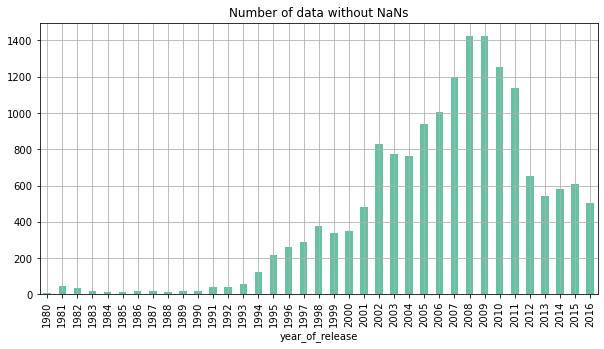

In [142]:
df.groupby(['year_of_release']).size().plot(
    kind='bar',
    grid=True,
    title='Number of data without NaNs',
    figsize=(10,5)
)
plt.show()

As we can see most of the missing data fall into period 1980-1994, and also there is some fluctuation across the entire sample period. To mitigate the effect of missing data, we will use grouping and transform method where it is applicable.

We have over 40% of missing values in 'critic_score' and 'user_score'.

We will fill Nans for multiplatform games based on the scores of these games on another platforms.

In [20]:
df['critic_score'] = df['critic_score'].fillna(df.groupby(['name'])['critic_score'].transform('first'))

In [21]:
crit_score000 = df['critic_score'].isna().sum()/len(df['critic_score']) 
print('Percentage of missing values is {: .2%}'.format(crit_score000))

Percentage of missing values is  45.74%


The percentage of missing values has slightly dropped. 

<br> 'user_score' column <br>
As the data type here is object we cannot apply the same method for filling nans with median. 

In [22]:
df['user_score'].value_counts()

tbd    2376
7.8     322
8       285
8.2     276
8.3     252
       ... 
0.3       2
1         2
0.5       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

In [23]:
#checking the data types in this column
df.user_score.apply(type).unique()

array([<class 'str'>, <class 'float'>], dtype=object)

Supposably 'tbd' has string type and the rest of the data here is float. We will check the percentage of TBDs and the rest values.

In [24]:
#defining share of every value
df['user_score'].value_counts()/len(df)

tbd    0.144490
7.8    0.019582
8      0.017332
8.2    0.016784
8.3    0.015325
         ...   
0.3    0.000122
1      0.000122
0.5    0.000122
0      0.000061
9.7    0.000061
Name: user_score, Length: 96, dtype: float64

We can see that there is a 15% of data named TBD. We will have a look at what info contain lines with TBD value. 

In [25]:
df[df.user_score=='tbd']

name platform  year_of_release       genre  \
119                     Zumba Fitness      Wii             2010      Sports   
301    Namco Museum: 50th Anniversary      PS2             2005        Misc   
520                   Zumba Fitness 2      Wii             2011      Sports   
645                      uDraw Studio      Wii             2010        Misc   
718                   Just Dance Kids      Wii             2010        Misc   
...                               ...      ...              ...         ...   
16695                 Planet Monsters      GBA             2001      Action   
16697                Bust-A-Move 3000       GC             2003      Puzzle   
16698                Mega Brain Boost       DS             2008      Puzzle   
16704                        Plushees       DS             2008  Simulation   
16706   Men in Black II: Alien Escape       GC             2003     Shooter   

       na_sales  eu_sales  jp_sales  other_sales  critic_score user_score  \
119        3.45      2.59       0.0         0.66          42.0        tbd   
301        2.08      1.35       0.0         0.54          61.0        tbd   
520        1.51      1.03       0.0         0.27           NaN        tbd   
645        1.65      0.57       0.0         0.20          71.0        tbd   
718        1.52      0.54       0.0         0.18           NaN        tbd   
...         ...       ...       ...          ...           ...        ...   
16695      0.01      0.00       0.0         0.00          67.0        tbd   
16697      0.01      0.00       0.0         0.00          53.0        tbd   
16698      0.01      0.00       0.0         0.00          48.0        tbd   
16704      0.01      0.00       0.0         0.00           NaN        tbd   
16706      0.01      0.00       0.0         0.00          50.0        tbd   

      rating  
119        E  
301     E10+  
520        T  
645        E  
718        E  
...      ...  
16695      E  
16697      E  
16698      E  
16704      E  
16706      T  

[2376 rows x 11 columns]

In [26]:
df[df.user_score=='tbd']['year_of_release'].value_counts()

2009    405
2010    331
2008    326
2011    217
2007    192
2002    192
2006    124
2005    121
2004    107
2003     95
2001     82
2000     43
2015     38
2016     34
2012     24
2014     21
2013     15
1999      8
1997      1
Name: year_of_release, dtype: int64

There is no clear pattern in this data, it refers to different years, platform, genres, etc. Obviously that the data cannot be restored. We will replace TBD with 'nan' to restore it further for the muliplatform games. Afterwords we will be able to change the data type. 

In [27]:
#replasing tbd with nan
df['user_score'] = df['user_score'].replace('tbd', np.nan)

In [28]:
user_score_nan = df['user_score'].isna().sum()/len(df['user_score'])
print('Percentage of missing values is {: .2%}'.format(user_score_nan))

Percentage of missing values is  54.62%


The persantage of nans has risen to 54%. 

Now we are filling Nans for multiplatform games based on the user's scores of these games on another platforms.

In [29]:
df['user_score'] = df['user_score'].fillna(df.groupby(['name'])['user_score'].transform('first'))
user_score000 = df['user_score'].isna().sum()/len(df['user_score']) 
print('Percentage of missing values is {: .2%}'.format(user_score000))

Percentage of missing values is  48.16%


In [30]:
#filling nans with 'o' value to change the data type later on. 
df['user_score'] = df['user_score'].fillna(0)

In [31]:
#changing the data type to round up the score and reduce the number of categories. 
df['user_score'] = df['user_score'].astype(float)
df['user_score'].value_counts()

0.0    7921
7.8     374
8.0     340
8.2     304
8.3     281
       ... 
0.6       2
0.9       2
2.3       2
9.7       2
9.6       2
Name: user_score, Length: 95, dtype: int64

<br> 'rating' column <br> 

In [32]:
df['rating'].value_counts()

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

In [33]:
df['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

We have over 40% of missing values here. We will leave the data as is. 

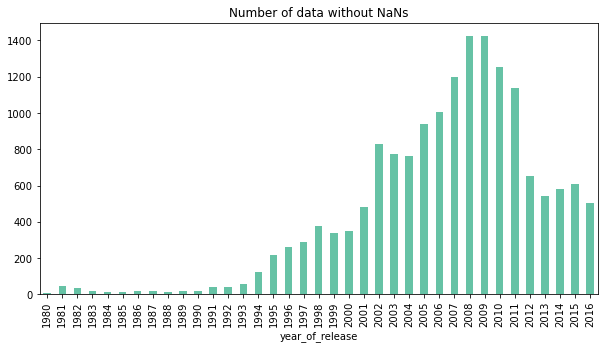

In [143]:
#The data after treating the missing values
df.groupby(['year_of_release']).size().plot(
    kind='bar',
    title='Number of data without NaNs',
    figsize=(10,5)
)
plt.show()

### Total sales

In [35]:
#calculating the sales across the different regions
df['total_sales']= df[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].sum(axis=1)
grouped_sales = df.groupby('year_of_release')['total_sales'].max().sort_values(ascending=False).reset_index()
grouped_sales 

year_of_release  total_sales
0              2006        82.54
1              1985        40.24
2              2008        35.52
3              2009        32.77
4              1996        31.38
5              1989        30.26
6              1984        28.31
7              2005        24.67
8              1999        23.09
9              2007        22.70
10             2010        21.82
11             2013        21.05
12             2004        20.81
13             1990        20.62
14             1988        17.28
15             2002        16.15
16             2001        14.97
17             2011        14.73
18             1998        14.64
19             2015        14.63
20             2012        13.79
21             2014        12.62
22             1992        11.18
23             1997        10.95
24             1993        10.55
25             1994         9.30
26             1982         7.81
27             2016         7.60
28             2003         7.20
29             1986         6.50
30             2000         6.39
31             1995         5.15
32             1991         4.61
33             1981         4.50
34             1987         4.38
35             1980         4.31
36             1983         3.20

Sales of games saw a steady growth though the years from USD 3.5 mln in 1985 to USD 82.54 mnl in 2006. Obviously the year 2006 was the most lucrative one. 

# Part 2. Data Analysis <a id='3'></a>

### Games release by years

In [36]:
#number of games released yearly
release_early = df.groupby('year_of_release')['name'].count().sort_values().reset_index()
release_early.head()

year_of_release  name
0             1980     9
1             1984    14
2             1985    14
3             1988    15
4             1990    16

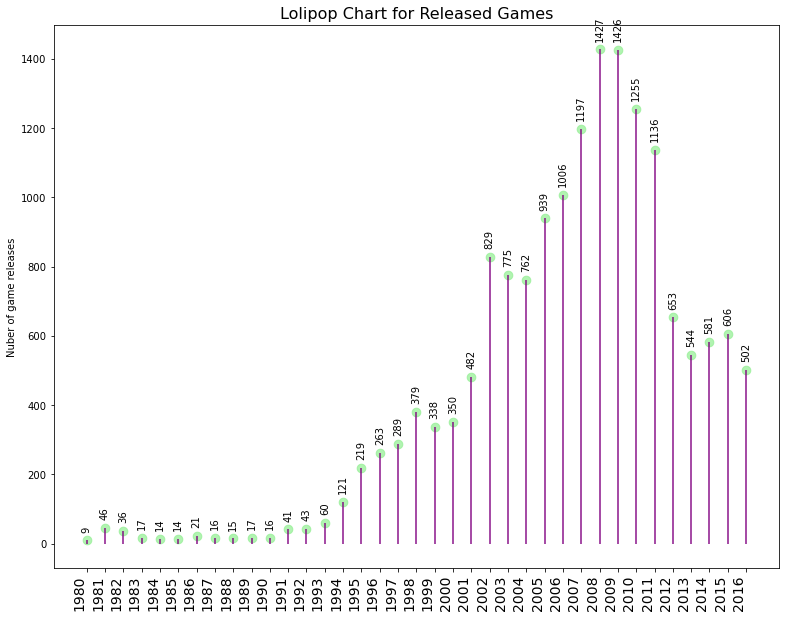

In [37]:
fig,ax=plt.subplots(figsize=(13,10))
ax.vlines(x=release_early.year_of_release, ymin=0, ymax=release_early.name, color='purple', alpha=0.7, linewidth=2)
ax.scatter(x=release_early.year_of_release, y=release_early.name, s=75, color='lightgreen', alpha=0.7)


ax.set_title('Lolipop Chart for Released Games', fontdict={'size':16})
ax.set_ylabel('Nuber of game releases')
ax.set_xticks(release_early.year_of_release)
ax.set_xticklabels(release_early.year_of_release,rotation=90, fontdict={'horizontalalignment':'right','size':14})

for  row in release_early.itertuples():
    ax.text(row.year_of_release, row.name+30,s=round(row.name,2), rotation=90, fontdict={'horizontalalignment':'center','size':10})

 Game releases boomed from 1994 and reached its peak at slightly over 1400 games per year in 2008 - 2009, during the following years number of  releases decreased. The strongest fall was in 2012 (from over 1100 to slightly less than 700) and since then number of releases stayed stable between 500 to 600 releases per year. Presumedly data from the first years of game production (1985-1994) is fractional and till year 2001 it is not significat due to the minor amount of games released. 

### Defining platforms  leading in sales <a id='4'></a>

Sorting out the platforms with biggest amount of total sales.

In [38]:
platform_sales = df[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales', ascending=False).reset_index()
platform_sales

platform  total_sales
0       PS2      1233.56
1      X360       961.24
2       PS3       931.34
3       Wii       891.18
4        DS       802.78
5        PS       727.58
6       PS4       314.14
7       GBA       312.88
8       PSP       289.53
9       3DS       257.81
10       PC       255.76
11       GB       254.43
12       XB       251.57
13      NES       251.05
14      N64       218.01
15     SNES       200.04
16       GC       196.73
17     XOne       159.32
18     2600        86.48
19     WiiU        82.19
20      PSV        53.81
21      SAT        33.59
22      GEN        28.35
23       DC        15.95
24      SCD         1.86
25       NG         1.44
26       WS         1.42
27     TG16         0.16
28      3DO         0.10
29       GG         0.04
30     PCFX         0.03

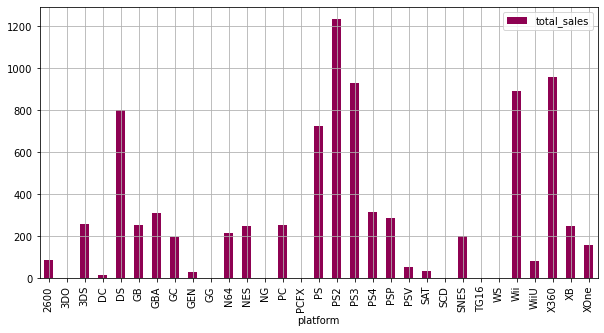

In [144]:
#visualizing total sales per platform
(df.groupby('platform')
 .agg({'total_sales': sum})
 .plot(y='total_sales', kind='bar', grid=True, figsize=(10,5), cmap='PiYG')
)
plt.show()

We will define how successful is the platform in relation to the mean value of sales. To to that we will calculate z-score for the distribution as a numerical measurement that describes a value's relationship to the mean of a group of values. If a Z-score is 0, it indicates that the score of total saleas of a platform is identical to the mean score.

In [40]:
#counting z-score for sales to define distribution 
platform_sales['sales_z']=(platform_sales['total_sales']-platform_sales['total_sales'].mean())/platform_sales['total_sales'].std()
platform_sales.head()

platform  total_sales   sales_z
0      PS2      1233.56  2.759744
1     X360       961.24  1.968011
2      PS3       931.34  1.881081
3      Wii       891.18  1.764321
4       DS       802.78  1.507310

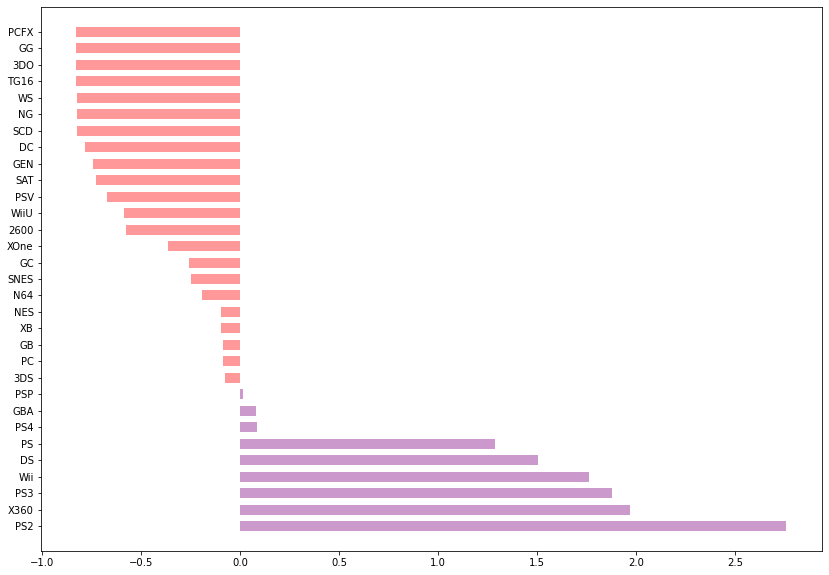

In [41]:
#distinguishing z-score by colors: red for negative values, blue for positive ones 
platform_sales['colors'] = ['red' if x<0 else 'purple' for x in platform_sales['sales_z']]
platform_sales['colors']
 
plt.figure(figsize=(14,10))
plt.hlines(y=platform_sales.platform, xmin=0, xmax=platform_sales.sales_z, colors=platform_sales.colors, alpha=0.4, linewidth=10)

The graph clearly shows that the most successful platforms with sales above average are to the right (in purple) and less successful are  to the left (in red) of the chart. 

### Platforms with the greatest total sales and distribution based on data for each year <a id='5'></a>

As we can see the last graph and table the top 6 leading platforms based on the total sales are PS2, X360, PS3, Wii, DS and PS. The rest are far behind the leaders. All the above with total sales over USD 700 mln. Distribution  will be built for these platforms.

In [42]:
#nlargest method for defining top 6 successful games
df.nlargest(6,['total_sales'])

name platform  year_of_release         genre  na_sales  \
0                Wii Sports      Wii             2006        Sports     41.36   
1         Super Mario Bros.      NES             1985      Platform     29.08   
2            Mario Kart Wii      Wii             2008        Racing     15.68   
3         Wii Sports Resort      Wii             2009        Sports     15.61   
4  Pokemon Red/Pokemon Blue       GB             1996  Role-Playing     11.27   
5                    Tetris       GB             1989        Puzzle     23.20   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
1      3.58      6.81         0.77           NaN         0.0    NaN   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
4      8.89     10.22         1.00           NaN         0.0    NaN   
5      2.26      4.22         0.58           NaN         0.0    NaN   

   total_sales  
0        82.54  
1        40.24  
2        35.52  
3        32.77  
4        31.38  
5        30.26

Analysis of the most successful games prove our choise of the most successful platforms.

In [43]:
#nsmallest method for defining 5 least popular games
df.nsmallest(5,['total_sales'])

name platform  \
16676                                  G1 Jockey 4 2008      PS3   
16709  SCORE International Baja 1000: The Official Game      PS2   
15384                                      Order of War       PC   
15486                    Arslan: The Warriors of Legend     XOne   
15499                                 Motocross Mania 3       XB   

       year_of_release     genre  na_sales  eu_sales  jp_sales  other_sales  \
16676             2008    Sports      0.00      0.00       0.0          0.0   
16709             2008    Racing      0.00      0.00       0.0          0.0   
15384             2009  Strategy      0.00      0.01       0.0          0.0   
15486             2016    Action      0.01      0.00       0.0          0.0   
15499             2005    Racing      0.01      0.00       0.0          0.0   

       critic_score  user_score rating  total_sales  
16676           NaN         0.0    NaN         0.00  
16709           NaN         0.0    NaN         0.00  
15384          69.0         7.3      T         0.01  
15486          69.0         5.8      T         0.01  
15499          38.0         3.6      T         0.01

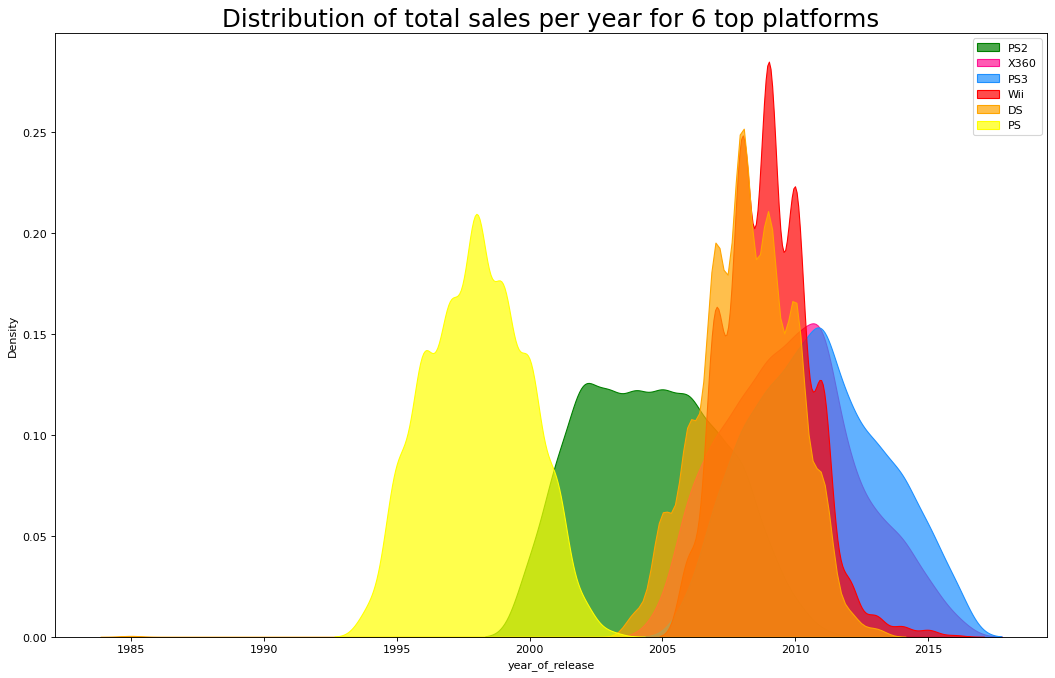

In [44]:
# Drawing Plot of distributoion of sales for leading platforms
plt.figure(figsize=(16,10), dpi= 80)
sns.kdeplot(df.loc[df['platform'] == "PS2", 'year_of_release'], shade=True, color="g", label="PS2", alpha=.7)
sns.kdeplot(df.loc[df['platform'] == "X360", 'year_of_release'], shade=True, color="deeppink", label="X360", alpha=.7)
sns.kdeplot(df.loc[df['platform'] == "PS3", 'year_of_release'], shade=True, color="dodgerblue", label="PS3", alpha=.7)
sns.kdeplot(df.loc[df['platform'] == "Wii", 'year_of_release'], shade=True, color="red", label="Wii", alpha=.7)
sns.kdeplot(df.loc[df['platform'] == "DS", 'year_of_release'], shade=True, color="orange", label="DS", alpha=.7)
sns.kdeplot(df.loc[df['platform'] == "PS", 'year_of_release'], shade=True, color="yellow", label="PS", alpha=.7)

# Decoration
plt.title('Distribution of total sales per year for 6 top platforms', fontsize=22)
plt.legend()
plt.show()

Below we will illustrate this 3-diamentional data with a heatmap chart.

In [45]:
df_select_platforms = df.query('platform == "PS2" or platform == "X360" or platform == "PS3" or platform == "Wii" or platform == "DS" or platform == "PS"')
df_heatmap_platforms=pd.pivot_table(df_select_platforms, index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
df_heatmap_platforms

platform             DS      PS     PS2     PS3     Wii    X360
year_of_release                                                
1985               0.02    0.00    0.00    0.00    0.00    0.00
1994               0.00    6.03    0.00    0.00    0.00    0.00
1995               0.00   35.96    0.00    0.00    0.00    0.00
1996               0.00   94.70    0.00    0.00    0.00    0.00
1997               0.00  136.17    0.00    0.00    0.00    0.00
1998               0.00  169.49    0.00    0.00    0.00    0.00
1999               0.00  144.53    0.00    0.00    0.00    0.00
2000               0.00   96.37   39.17    0.00    0.00    0.00
2001               0.00   35.59  166.43    0.00    0.00    0.00
2002               0.00    6.67  205.38    0.00    0.00    0.00
2003               0.00    2.07  184.31    0.00    0.00    0.00
2004              17.27    0.00  211.81    0.00    0.00    0.00
2005             130.14    0.00  160.66    0.00    0.00    8.25
2006             119.81    0.00  103.42   20.96  137.15   51.62
2007             146.94    0.00   75.99   73.19  152.77   95.41
2008             145.31    0.00   53.90  118.52  171.32  135.26
2009             119.54    0.00   26.40  130.93  206.97  120.29
2010              85.02    0.00    5.64  142.17  127.95  170.03
2011              26.18    0.00    0.45  156.78   59.65  143.84
2012              11.01    0.00    0.00  107.36   21.71   99.74
2013               1.54    0.00    0.00  113.25    8.59   88.58
2014               0.00    0.00    0.00   47.76    3.75   34.74
2015               0.00    0.00    0.00   16.82    1.14   11.96
2016               0.00    0.00    0.00    3.60    0.18    1.52

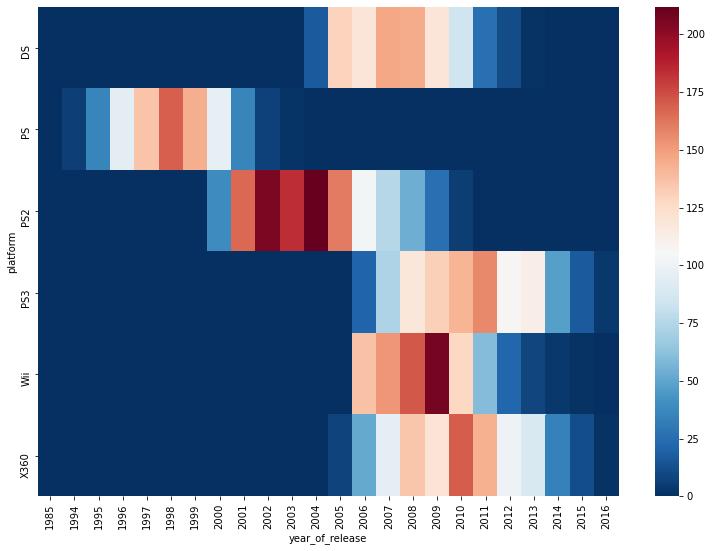

In [46]:
plt.figure(figsize=(13,9))
sns.heatmap(df_heatmap_platforms.T, cmap="RdBu_r")

The heatmap allows us to have another angle of view on the data and get deeper comprehension of the processes. 

Buding distribution chart for every platform one by one separately 

In [47]:
#1st platform
top_6_platforms_PS2 = df.query('platform=="PS2"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
top_6_platforms_PS2.head(3)

year_of_release  na_sales  eu_sales  jp_sales  other_sales  critic_score  \
0             2011      0.13      0.13      0.09         0.10         314.0   
1             2010      2.19      1.54      0.71         1.20         988.0   
2             2009      9.36      4.94      1.94        10.16        3142.0   

   user_score  total_sales  
0        24.6         0.45  
1       107.8         5.64  
2       293.5        26.40

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


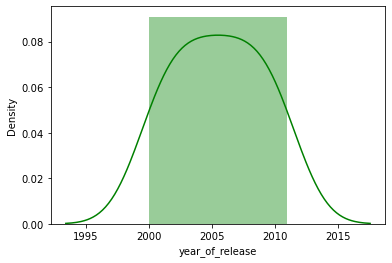

In [48]:
#chart
sns.distplot(top_6_platforms_PS2['year_of_release'], label = 'PS2', color = 'g', bins=12)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


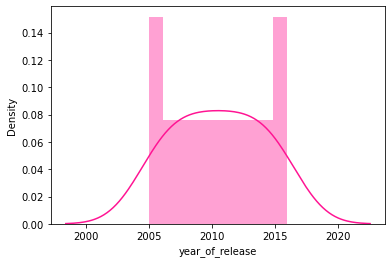

In [49]:
#2nd platform
top_6_platforms_X360 = df.query('platform=="X360"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
sns.distplot(top_6_platforms_X360['year_of_release'], label = 'X360', color = 'deeppink', bins=10)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


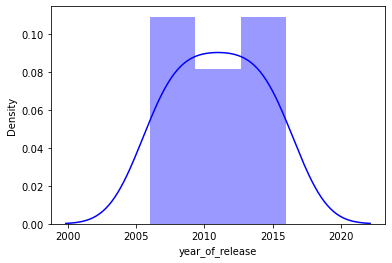

In [50]:
#3rd platform
top_6_platforms_PS3 = df.query('platform=="PS3"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
sns.distplot(top_6_platforms_PS3['year_of_release'], label = 'PS3', color = 'b')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


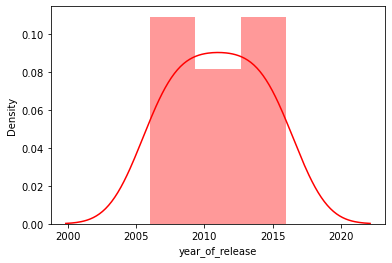

In [51]:
#4th platform
top_6_platforms_Wii = df.query('platform=="Wii"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
sns.distplot(top_6_platforms_Wii['year_of_release'], label = 'Wii', color = 'r')

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


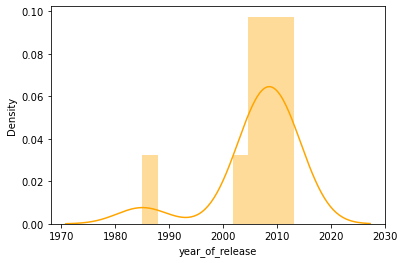

In [52]:
#5th platform
top_6_platforms_DS = df.query('platform=="DS"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
sns.distplot(top_6_platforms_DS['year_of_release'], label = 'DS', color = 'orange', bins=10)

In [53]:
#surching for outlier
DS_outlier = df.query('platform=="DS" and year_of_release <1990')
DS_outlier

name platform  year_of_release   genre  \
15957  Strongest Tokyo University Shogi DS       DS             1985  Action   

       na_sales  eu_sales  jp_sales  other_sales  critic_score  user_score  \
15957       0.0       0.0      0.02          0.0           NaN         0.0   

      rating  total_sales  
15957    NaN         0.02

A quick search gives us information, that development on the Nintendo DS began around mid-2002. Thus we can drop the line with game name "Shogi DS" as it is obviously not connected to the popular game platform.

In [54]:
df=df.drop(index=15957)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


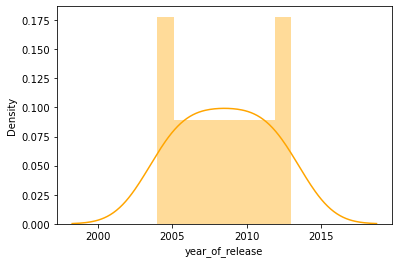

In [55]:
top_6_platforms_DS_no_outlier = df.query('platform=="DS"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
sns.distplot(top_6_platforms_DS_no_outlier['year_of_release'], label = 'DS', color = 'orange', bins=8)

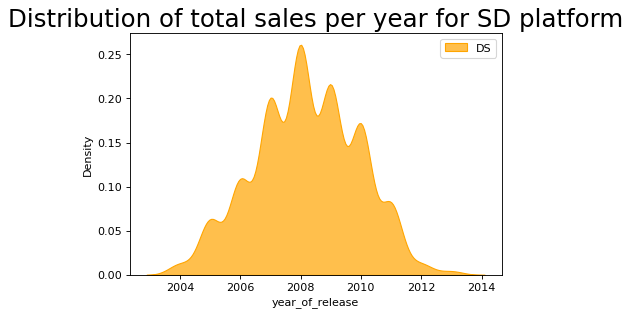

In [56]:
plt.figure(figsize=(6,4), dpi= 80)

sns.kdeplot(df.loc[df['platform'] == "DS", 'year_of_release'], shade=True, color="orange", label="DS", alpha=.7)

# Decoration
plt.title('Distribution of total sales per year for SD platform', fontsize=22)
plt.legend()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


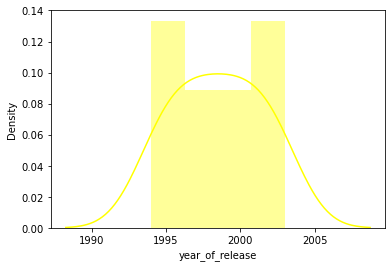

In [57]:
#6th platform
top_6_platforms_PS = df.query('platform=="PS"').groupby('year_of_release').sum().sort_values(by='total_sales').reset_index()
sns.distplot(top_6_platforms_PS['year_of_release'], label = 'PS', color = 'yellow', bins=4)

The charts illustrate that every platform had their life cycle that lasted aproximately 10 years. Some patforms have several peaks in the middle corresponding to the launch of new games. 

We are going to build a treemap to get a general picture of distribution of the market. 

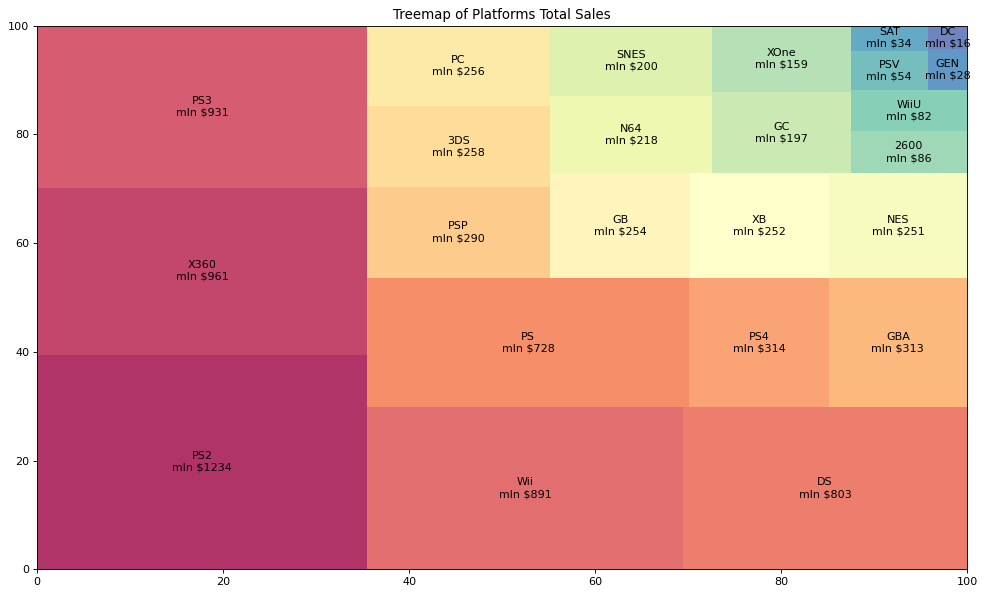

In [58]:
df_tree = df[['platform', 'total_sales']].groupby('platform').sum().sort_values(by='total_sales', ascending=False).reset_index()
df_tree=df_tree[df_tree['total_sales']>=15]

sizes=df_tree.total_sales.values.tolist()
labels = df_tree.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Platforms Total Sales')
#plt.axis('off')
plt.show()

Our 6 markets leaders are all in shades of purple to the left and bottom part of the chart. 

### Find platforms that used to be popular but now have zero sales. How long does it generally take for new platforms to appear and old ones to fade? <a id='6'></a>

All the most popular platforms with the bigest amount of sales by year 2016 demonstrate drop of sales and according to the graphs their life cycle or has ended or heading to an end. Judging by the leaders of the market the period of time from launching the platform to its end is about 9-10 years. 

<br> PS platform, the first of the leaders, emerged in 1993 and completely stopped selling by 2004. The top sells were reached by 1998. Decline of sales started right after 1998, that corresponds with the launch of a new future leader (PS2) and boom of its sells .  All in all it took 10 years for a platform to get from the first to the last one.  </br>

<br> PS2, the top selling platform, did not have such sharp peaks as its predecessor, but it took them only about 3-4 years to get to the top of their sales and then for 4 years their sales were steady and high without any declines. PS2 had never reached the highest peaks of PS sales but in lenght of its stable peak it had no rivals. Decline in sales started in 2005 as 4 other future market leaders were gaining popularity. As to Wikipedia ["On November 29, 2005, the PS2 became the fastest game console to reach 100 million units shipped, accomplishing the feat within 5 years and 9 months from its launch. This achievement occurred faster than its predecessor, the PlayStation, which took 9 years and 6 months since launch" to reach the same figure."](https://en.wikipedia.org/wiki/PlayStation#PlayStation). PS production ended in 2012 thus the platform was active for 12 years. By year 2015 it still kept the rank of the best selling console [of all the time](https://www.theguardian.com/technology/2013/jan/04/playstation-2-manufacture-ends-years?INTCMP=SRCH)  </br>

<br> DS released globally across 2004 - 2005. In 2014 production ended, it was added to the Wii </br>

<br> PS3 was released 2006,competed with X360 and Wii launched a year before. It had never reached the amount of sales its main rivals. Shipments of new units ended in 2016. The platform lived for 10 years. </br>
<br> Wii was launched in 2006. From 2013, Internet services were gradually discontinued; and Wii could no longer be purchased after 2018. The platform lived for 12 years. </br>

<br> X360 was launched across 2005–2006 and in 2016 its production ended. 10 years of sales.</br>

<br> The leading platforms had completed their launch in the key markets within one year. After growth of sales they reached their peak and after emrging new sucessful rivals the old ones headed to decline that lasted about 4-5 years.</br>

We are going to build a treemap to investigate life cycle of the platforms. 

### Defining significant period for the data. <a id='7'></a>

Taking into account quality of data and amount of sales in the first years of game production we should not take into account data before year 2001. As life cycle of a platform is 10 years on average, data starting from 2001 also will sute the purposes of analysis because this period includes 1.5 of a lifecycle time. This will also be sufficient for building prognosis for 2017. 

###  Which platforms are growing or shrinking. Several potentially profitable platforms. <a id='8'></a>

Building a shiftmap for platforms. Taking into account only the ones released after 2000.

In [59]:
df_after_2000 = df[df.year_of_release>2000]
df_after_2000.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91

In [60]:
df1=pd.pivot_table(df_after_2000, index='year_of_release', columns='platform', values='total_sales', aggfunc=sum, fill_value=0)
df1

platform           3DS    DC      DS    GB    GBA     GC   N64     PC     PS  \
year_of_release                                                                
2001              0.00  1.07    0.00  9.24  61.53  26.34  3.25   5.47  35.59   
2002              0.00  0.29    0.00  0.00  74.16  51.81  0.08   8.57   6.67   
2003              0.00  0.00    0.00  0.00  56.67  50.61  0.00   8.84   2.07   
2004              0.00  0.00   17.27  0.00  77.91  28.82  0.00  10.39   0.00   
2005              0.00  0.00  130.14  0.00  33.86  27.62  0.00   4.37   0.00   
2006              0.00  0.00  119.81  0.00   5.28  11.26  0.00   2.85   0.00   
2007              0.00  0.02  146.94  0.00   3.40   0.27  0.00   9.28   0.00   
2008              0.00  0.04  145.31  0.00   0.00   0.00  0.00  12.42   0.00   
2009              0.00  0.00  119.54  0.00   0.00   0.00  0.00  16.91   0.00   
2010              0.00  0.00   85.02  0.00   0.00   0.00  0.00  24.28   0.00   
2011             63.20  0.00   26.18  0.00   0.00   0.00  0.00  35.03   0.00   
2012             51.36  0.00   11.01  0.00   0.00   0.00  0.00  23.22   0.00   
2013             56.57  0.00    1.54  0.00   0.00   0.00  0.00  12.38   0.00   
2014             43.76  0.00    0.00  0.00   0.00   0.00  0.00  13.28   0.00   
2015             27.78  0.00    0.00  0.00   0.00   0.00  0.00   8.52   0.00   
2016             15.14  0.00    0.00  0.00   0.00   0.00  0.00   5.25   0.00   

platform            PS2     PS3     PS4    PSP    PSV    WS     Wii   WiiU  \
year_of_release                                                              
2001             166.43    0.00    0.00   0.00   0.00  0.28    0.00   0.00   
2002             205.38    0.00    0.00   0.00   0.00  0.00    0.00   0.00   
2003             184.31    0.00    0.00   0.00   0.00  0.00    0.00   0.00   
2004             211.81    0.00    0.00   7.06   0.00  0.00    0.00   0.00   
2005             160.66    0.00    0.00  43.84   0.00  0.00    0.00   0.00   
2006             103.42   20.96    0.00  55.32   0.00  0.00  137.15   0.00   
2007              75.99   73.19    0.00  46.93   0.00  0.00  152.77   0.00   
2008              53.90  118.52    0.00  34.55   0.00  0.00  171.32   0.00   
2009              26.40  130.93    0.00  37.78   0.00  0.00  206.97   0.00   
2010               5.64  142.17    0.00  35.04   0.00  0.00  127.95   0.00   
2011               0.45  156.78    0.00  17.82   4.63  0.00   59.65   0.00   
2012               0.00  107.36    0.00   7.69  16.19  0.00   21.71  17.56   
2013               0.00  113.25   25.99   3.14  10.59  0.00    8.59  21.65   
2014               0.00   47.76  100.00   0.24  11.90  0.00    3.75  22.03   
2015               0.00   16.82  118.90   0.12   6.25  0.00    1.14  16.35   
2016               0.00    3.60   69.25   0.00   4.25  0.00    0.18   4.60   

platform           X360     XB   XOne  
year_of_release                        
2001               0.00  22.26   0.00  
2002               0.00  48.01   0.00  
2003               0.00  55.04   0.00  
2004               0.00  65.42   0.00  
2005               8.25  49.08   0.00  
2006              51.62  10.04   0.00  
2007              95.41   0.55   0.00  
2008             135.26   0.18   0.00  
2009             120.29   0.00   0.00  
2010             170.03   0.00   0.00  
2011             143.84   0.00   0.00  
2012              99.74   0.00   0.00  
2013              88.58   0.00  18.96  
2014              34.74   0.00  54.07  
2015              11.96   0.00  60.14  
2016               1.52   0.00  26.15

In [61]:
df1.shift(+1).tail()

platform           3DS   DC     DS   GB  GBA   GC  N64     PC   PS   PS2  \
year_of_release                                                            
2012             63.20  0.0  26.18  0.0  0.0  0.0  0.0  35.03  0.0  0.45   
2013             51.36  0.0  11.01  0.0  0.0  0.0  0.0  23.22  0.0  0.00   
2014             56.57  0.0   1.54  0.0  0.0  0.0  0.0  12.38  0.0  0.00   
2015             43.76  0.0   0.00  0.0  0.0  0.0  0.0  13.28  0.0  0.00   
2016             27.78  0.0   0.00  0.0  0.0  0.0  0.0   8.52  0.0  0.00   

platform            PS3     PS4    PSP    PSV   WS    Wii   WiiU    X360   XB  \
year_of_release                                                                 
2012             156.78    0.00  17.82   4.63  0.0  59.65   0.00  143.84  0.0   
2013             107.36    0.00   7.69  16.19  0.0  21.71  17.56   99.74  0.0   
2014             113.25   25.99   3.14  10.59  0.0   8.59  21.65   88.58  0.0   
2015              47.76  100.00   0.24  11.90  0.0   3.75  22.03   34.74  0.0   
2016              16.82  118.90   0.12   6.25  0.0   1.14  16.35   11.96  0.0   

platform          XOne  
year_of_release         
2012              0.00  
2013              0.00  
2014             18.96  
2015             54.07  
2016             60.14

In [62]:
#calculating dynamic of sales
sales_dynamics = df1-df1.shift(+1)
sales_dynamics.tail()

platform           3DS   DC     DS   GB  GBA   GC  N64     PC   PS   PS2  \
year_of_release                                                            
2012            -11.84  0.0 -15.17  0.0  0.0  0.0  0.0 -11.81  0.0 -0.45   
2013              5.21  0.0  -9.47  0.0  0.0  0.0  0.0 -10.84  0.0  0.00   
2014            -12.81  0.0  -1.54  0.0  0.0  0.0  0.0   0.90  0.0  0.00   
2015            -15.98  0.0   0.00  0.0  0.0  0.0  0.0  -4.76  0.0  0.00   
2016            -12.64  0.0   0.00  0.0  0.0  0.0  0.0  -3.27  0.0  0.00   

platform           PS3    PS4    PSP    PSV   WS    Wii   WiiU   X360   XB  \
year_of_release                                                              
2012            -49.42   0.00 -10.13  11.56  0.0 -37.94  17.56 -44.10  0.0   
2013              5.89  25.99  -4.55  -5.60  0.0 -13.12   4.09 -11.16  0.0   
2014            -65.49  74.01  -2.90   1.31  0.0  -4.84   0.38 -53.84  0.0   
2015            -30.94  18.90  -0.12  -5.65  0.0  -2.61  -5.68 -22.78  0.0   
2016            -13.22 -49.65  -0.12  -2.00  0.0  -0.96 -11.75 -10.44  0.0   

platform          XOne  
year_of_release         
2012              0.00  
2013             18.96  
2014             35.11  
2015              6.07  
2016            -33.99

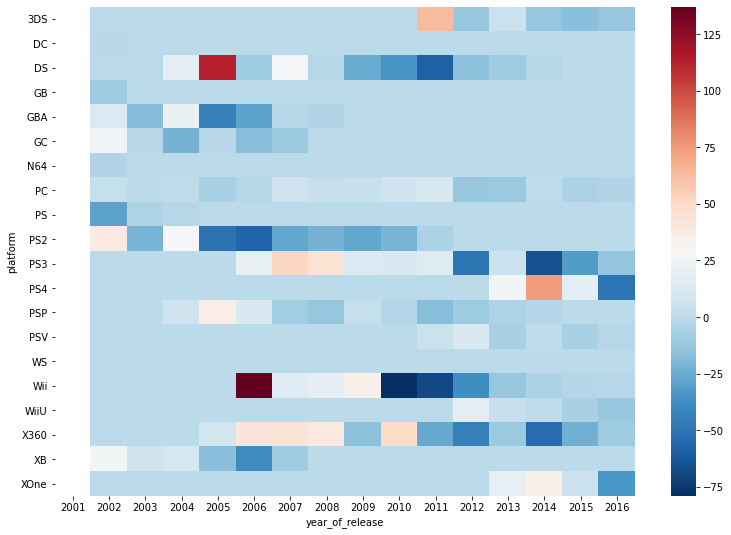

In [145]:
#illustrating the dynamics
plt.figure(figsize=(13,9))
sns.heatmap(sales_dynamics.T, cmap="RdBu_r")
plt.show()

AS to the above calculations all the platforms have drop in sales in 2016 in comparison to 2015. Life cycle of the most platforms has ended by 2016. Either the companies have already ended production of new hardware or their sales are dropping.  Based on the current data we cannot choose any potentially profitable platforms. 

### Box plot for the global sales of all games, broken down by platform <a id='9'></a>

In [64]:
grouped = df_after_2000.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped

platform  year_of_release  total_sales
0        3DS             2011        63.20
1        3DS             2012        51.36
2        3DS             2013        56.57
3        3DS             2014        43.76
4        3DS             2015        27.78
..       ...              ...          ...
136       XB             2008         0.18
137     XOne             2013        18.96
138     XOne             2014        54.07
139     XOne             2015        60.14
140     XOne             2016        26.15

[141 rows x 3 columns]

In [65]:
ordered=grouped.groupby(['platform'])['total_sales'].sum().sort_values().reset_index()['platform']
ordered

0       WS
1       DC
2      N64
3       GB
4       PS
5      PSV
6     WiiU
7     XOne
8       GC
9       PC
10      XB
11     3DS
12     PSP
13     GBA
14     PS4
15      DS
16     Wii
17     PS3
18    X360
19     PS2
Name: platform, dtype: object

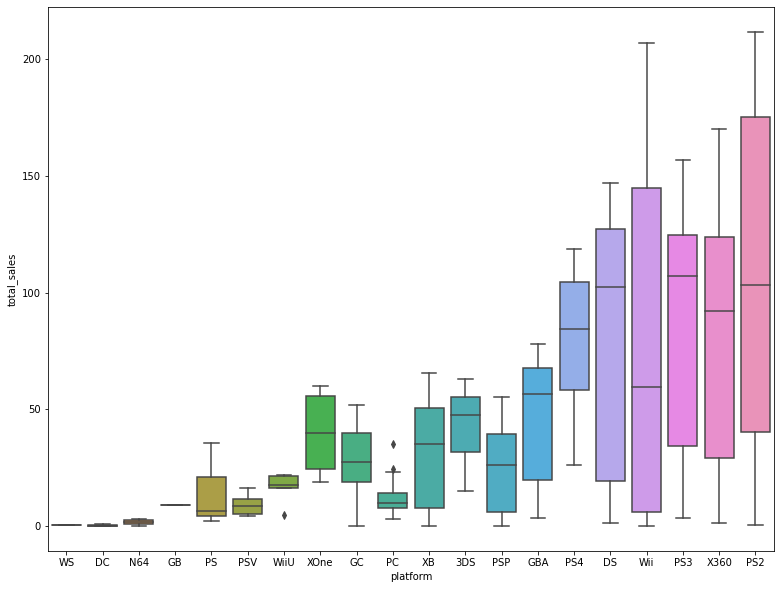

In [66]:
plt.figure(figsize=(13,10))
sns.boxplot(x='platform', y='total_sales', data=grouped, order=ordered)

<br>The boxplot chart clearly illustrates that platforms perform dramatically different as to their total sales. To the right we have almost the same group of 6 market leaders. As we have chosen only the platformes releases after 2000 year, PS platform has not made it to the group of leaders (most of its games were released well before), but PS4 has. </br> 
We will look into leaders' performance in a more detailed way. 


In [67]:
#picking leaders
df_after_2000_leaders = df_after_2000[df_after_2000.platform.isin(("PS2", "X360", "PS3", "Wii", "DS"))]
df_after_2000_leaders.head()

name platform  year_of_release     genre  na_sales  \
0             Wii Sports      Wii             2006    Sports     41.36   
2         Mario Kart Wii      Wii             2008    Racing     15.68   
3      Wii Sports Resort      Wii             2009    Sports     15.61   
6  New Super Mario Bros.       DS             2006  Platform     11.28   
7               Wii Play      Wii             2006      Misc     13.96   

   eu_sales  jp_sales  other_sales  critic_score  user_score rating  \
0     28.96      3.77         8.45          76.0         8.0      E   
2     12.76      3.79         3.29          82.0         8.3      E   
3     10.93      3.28         2.95          80.0         8.0      E   
6      9.14      6.50         2.88          89.0         8.5      E   
7      9.18      2.93         2.84          58.0         6.6      E   

   total_sales  
0        82.54  
2        35.52  
3        32.77  
6        29.80  
7        28.91

In [68]:
grouped_leaders = df_after_2000_leaders.groupby(['platform', 'year_of_release'])['total_sales'].sum().reset_index()
grouped_leaders.head()

platform  year_of_release  total_sales
0       DS             2004        17.27
1       DS             2005       130.14
2       DS             2006       119.81
3       DS             2007       146.94
4       DS             2008       145.31

In [69]:
import plotly.express as px

fig = px.box(grouped_leaders, x="platform", y="total_sales", color="platform")
fig.update_traces(quartilemethod="exclusive") 
fig.show()

Median values for leaders also vary greatly: from USD 59.65 mln for Wii to 103.42 mln for PS2.  </br>
<br> PS2 is a leader with the highest value of median, biggest maximum value; the middle 50% of sales is between 26.4 mln and 184.31 mln. </br>
<br> Wii platform has the lowest value of median among the leaders, distribution of its sales has a long upper wisker and the distribution is scewed to the right. Middle 50% of its sales were between 3.75 and 152.77 mln. </br>
<br> The least succesful among these leaders is DS platform with median value of 102,28 mln, maximum value of 146.94 mln and middle 50% between 17.27 mln and 130.14 mln. </br>
In general the difference in sales is significant even between the leaders.

### How user and professional reviews affect sales for a popular platform. Correlation between reviews and sales. <a id='10'></a>

We will look at data for PS2 as the most popular platform as for 2015. 

In [70]:
review_correlation_PS2 = df.query('platform=="PS"').groupby('user_score').sum().sort_values(by='total_sales').reset_index()
review_correlation_PS2.head()

user_score  year_of_release  na_sales  eu_sales  jp_sales  other_sales  \
0         3.5             1995      0.00      0.00      0.07         0.00   
1         4.5             2001      0.07      0.05      0.00         0.01   
2         6.2             2000      0.07      0.05      0.00         0.01   
3         6.4             2001      0.08      0.06      0.00         0.01   
4         1.2             2000      0.09      0.06      0.00         0.01   

   critic_score  total_sales  
0          43.0         0.07  
1          49.0         0.13  
2          75.0         0.13  
3          81.0         0.15  
4          35.0         0.16

In [71]:
grouped_correlation_PS2 = review_correlation_PS2.groupby(['user_score', 'critic_score'])['total_sales'].sum().reset_index()
grouped_correlation_PS2.head()

user_score  critic_score  total_sales
0         0.0        2879.0       480.68
1         1.2          35.0         0.16
2         2.4          28.0         0.21
3         3.5          43.0         0.07
4         3.8          65.0         0.37

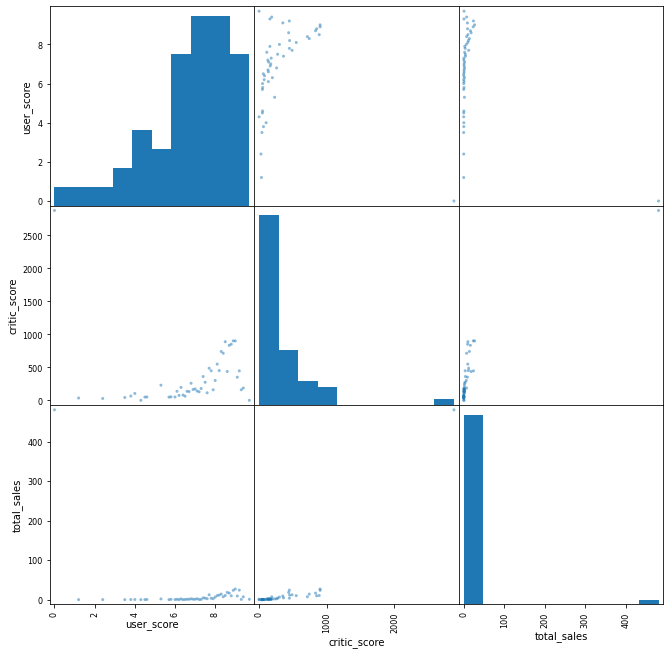

In [72]:
#building scatter plots in pairs for the chosen parameters
pd.plotting.scatter_matrix(grouped_correlation_PS2, figsize=(11, 11)) 
plt.show()

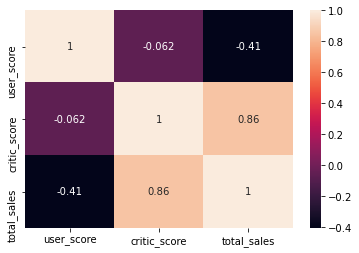

In [73]:
corrMatrix = grouped_correlation_PS2.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Both the scatterplot and the matrix show that there is a strong linear connection between critic scors and total sales of the platform games. User score  and total sales have weak negative relationship. 

### Comparison of the sales for other platforms.

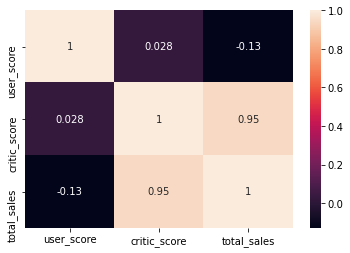

In [74]:
#we will calculate correlation for the least successful of the market leaders, DS
review_correlation_DS = df.query('platform=="DS"').groupby('user_score').sum().sort_values(by='total_sales').reset_index()
grouped_correlation_DS = review_correlation_DS.groupby(['user_score', 'critic_score'])['total_sales'].sum().reset_index()
corrMatrix = grouped_correlation_DS.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

The second matrix shows the same pattern: here is a strong positive correlation between critic scors and total sales of the platform games and week negative relationship between sales and users scores. And there is almost no correlation between users and critic scores.

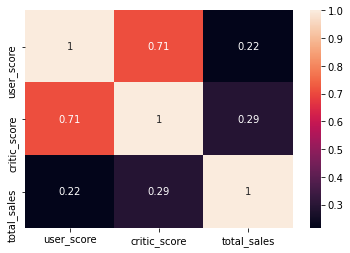

In [75]:
#corr for a middle outsider, WiiU
review_correlation_WiiU = df.query('platform=="WiiU"').groupby('user_score').sum().sort_values(by='total_sales').reset_index()
grouped_correlation_WiiU = review_correlation_WiiU.groupby(['user_score', 'critic_score'])['total_sales'].sum().reset_index()
corrMatrix = grouped_correlation_WiiU.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

Here we can see that correlation between critic scors and total sales of the platform games is much weaker, almost like user score. Users and critic scores have strong degree of relationship here. 

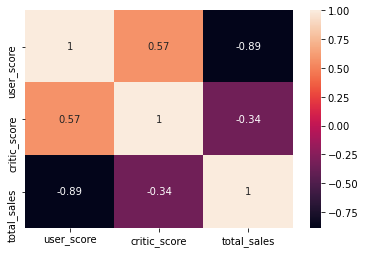

In [76]:
#corr for one of the least successful platform, DC
review_correlation_DC = df.query('platform=="DC"').groupby('user_score').sum().sort_values(by='total_sales').reset_index()
grouped_correlation_DC = review_correlation_DC.groupby(['user_score', 'critic_score'])['total_sales'].sum().reset_index()
corrMatrix = grouped_correlation_DC.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

For an outsider correlation between critic scors and total sales is weak, user scores have strong negative correlation with the sales. Users and critic scores also have strong positive correlation. 

All in all for all groups of platforms we can see that linear correlation between the 3 factors is not stable through the platforms. 

### General distribution of games by genre <a id='11'></a>

In [77]:
df['genre'].value_counts()

Action          3306
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Adventure       1293
Racing          1226
Platform         878
Simulation       857
Fighting         837
Strategy         673
Puzzle           569
Name: genre, dtype: int64

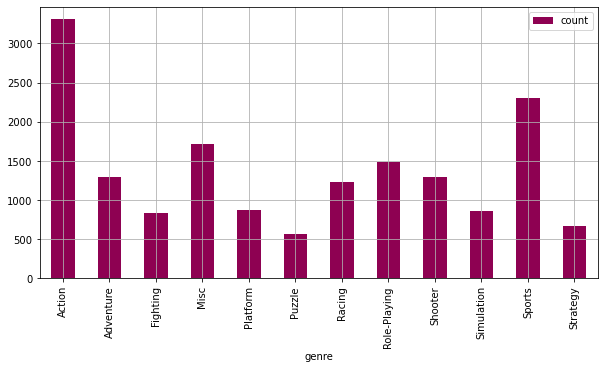

In [137]:
# As genre is a  categorical parameter, distribution will be presented by a bar chart.
(df.groupby('genre')
 .agg({'genre': ['count']})
 .plot(y='genre', kind='bar', grid=True, figsize=(10,5), cmap='PiYG')
)
plt.show()

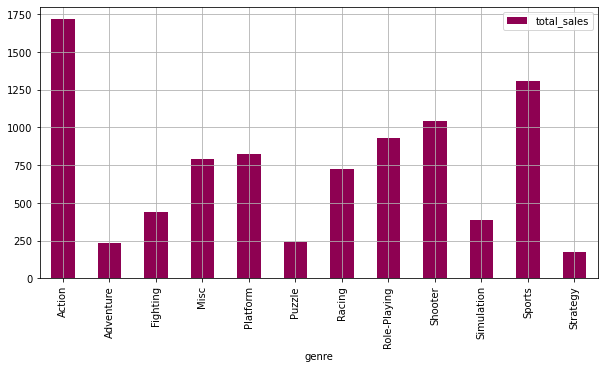

In [138]:
# Distribution of total sales by genre 
(df.groupby('genre')
 .agg({'total_sales': sum})
 .plot(y='total_sales', kind='bar', grid=True, figsize=(10,5), cmap='PiYG')
)
plt.show()

In [80]:
grouped_genres = df.groupby(['genre', 'year_of_release'])['total_sales'].sum().reset_index()
grouped_genres

genre  year_of_release  total_sales
0      Action             1980         0.34
1      Action             1981        14.79
2      Action             1982         6.50
3      Action             1983         2.86
4      Action             1984         1.85
..        ...              ...          ...
382  Strategy             2012         3.26
383  Strategy             2013         6.12
384  Strategy             2014         0.98
385  Strategy             2015         1.85
386  Strategy             2016         1.13

[387 rows x 3 columns]

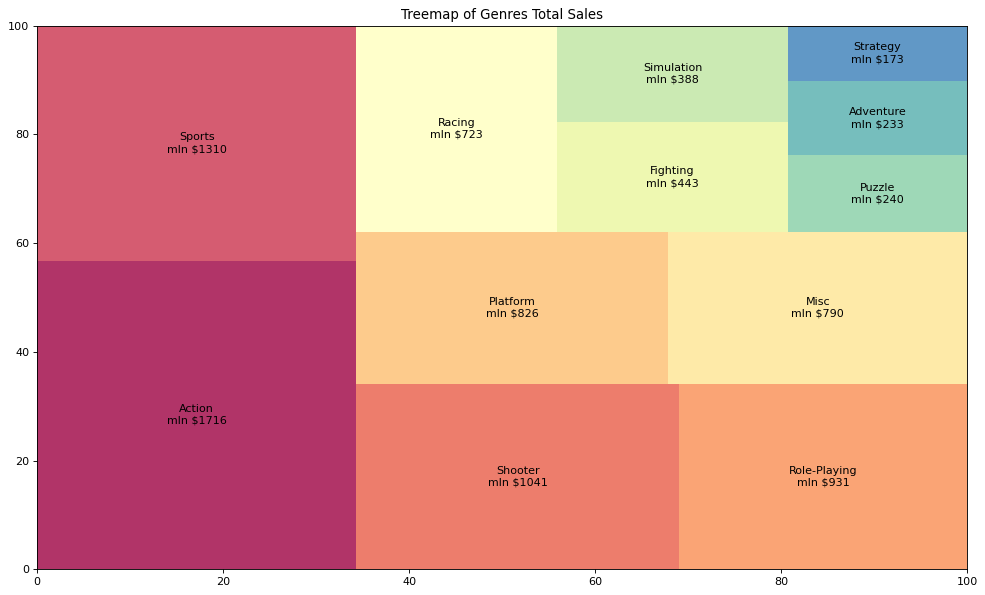

In [81]:
# General market view from the total sales point of view 
df_genres_tree = df[['genre', 'total_sales']].groupby('genre').sum().sort_values(by='total_sales', ascending=False).reset_index()
df_genres_tree=df_genres_tree[df_genres_tree['total_sales']!=0]

sizes=df_genres_tree.total_sales.values.tolist()
labels = df_genres_tree.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Treemap of Genres Total Sales')
plt.show()

Judging by total sales though all the years of analysis the most lucrative genres are: action, sports and and shooter. Puzzle and strategy have brought the least amount of money. 

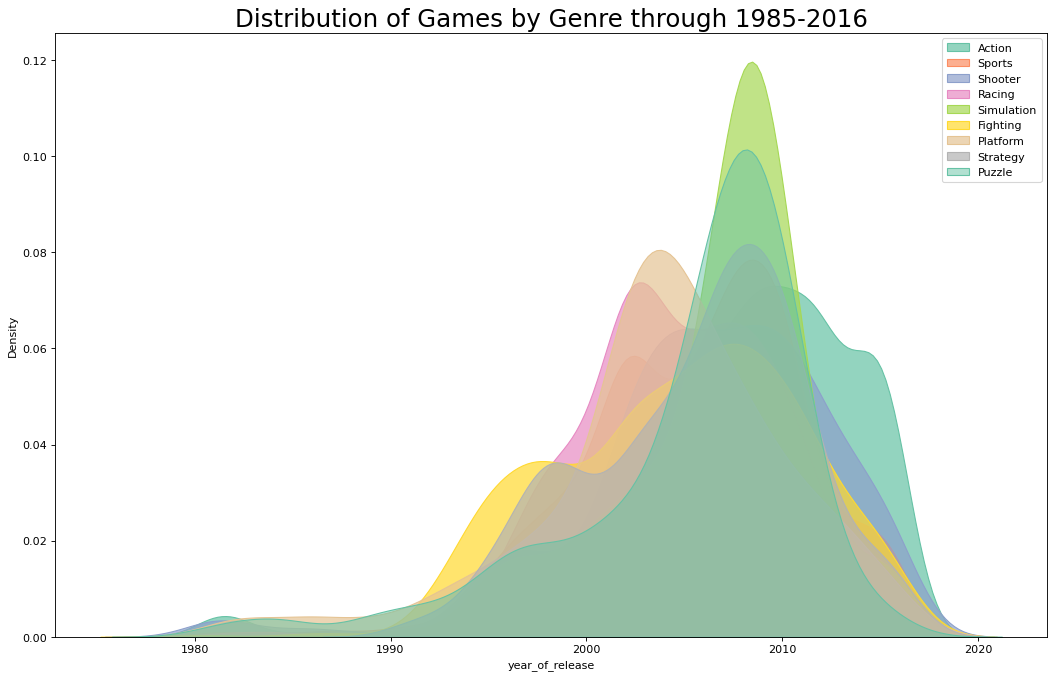

In [139]:
#Distribution of genres through the years
# Drawing Plot of distributoion for leading platforms
plt.figure(figsize=(16,10), dpi= 80)
sns.set_palette("Set2")

sns.kdeplot(df.loc[df['genre'] == "Action", 'year_of_release'], shade=True, label="Action", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Sports", 'year_of_release'], shade=True, label="Sports", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Shooter", 'year_of_release'], shade=True, label="Shooter", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Racing", 'year_of_release'], shade=True, label="Racing", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Simulation", 'year_of_release'], shade=True, label="Simulation", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Fighting", 'year_of_release'], shade=True, label="Fighting", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Platform", 'year_of_release'], shade=True, label="Platform", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Strategy", 'year_of_release'], shade=True, label="Strategy", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Puzzle", 'year_of_release'], shade=True, label="Puzzle", alpha=.5)
# Decoration
plt.title('Distribution of Games by Genre through 1985-2016', fontsize=22)
plt.legend()
plt.show()

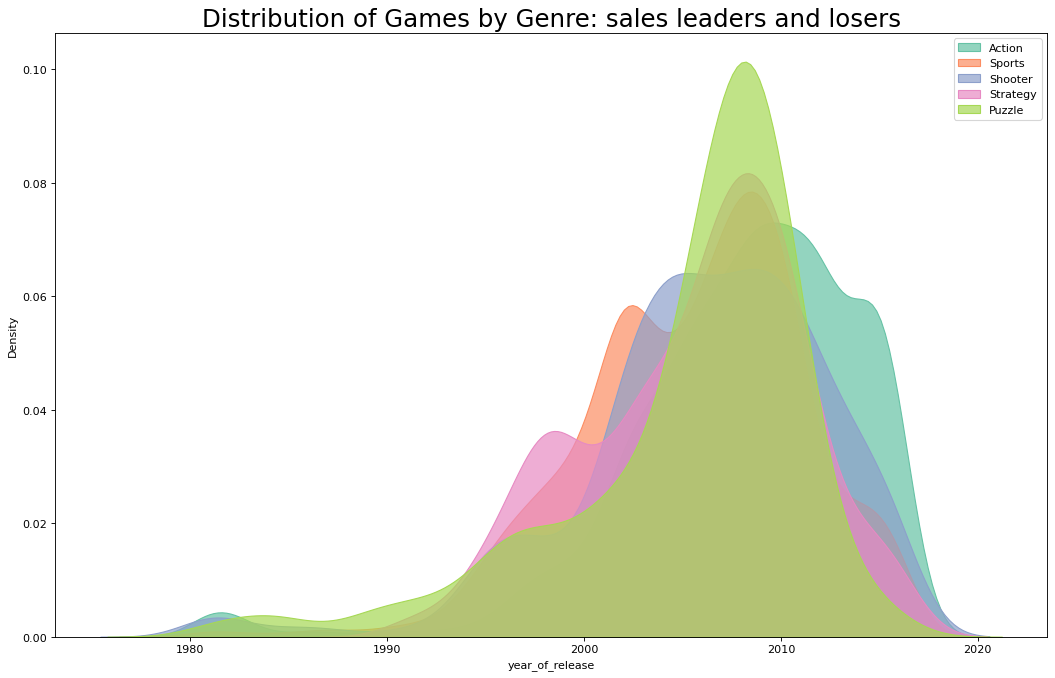

In [83]:
#Having a look at the 3 most profitable and 2 the least profitable genres

plt.figure(figsize=(16,10), dpi= 80)
sns.set_palette("Set2")

sns.kdeplot(df.loc[df['genre'] == "Action", 'year_of_release'], shade=True, label="Action", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Sports", 'year_of_release'], shade=True, label="Sports", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Shooter", 'year_of_release'], shade=True, label="Shooter", alpha=.7)

sns.kdeplot(df.loc[df['genre'] == "Strategy", 'year_of_release'], shade=True, label="Strategy", alpha=.7)
sns.kdeplot(df.loc[df['genre'] == "Puzzle", 'year_of_release'], shade=True, label="Puzzle", alpha=.7)
# Decoration
plt.title('Distribution of Games by Genre: sales leaders and losers', fontsize=22)
plt.legend()
plt.show()

Below is presentation of the data on the heatmap.

In [84]:
df_select_genre = df.query('genre == "Action" or genre == "Sports" or genre == "Shooter" or genre == "Strategy" or genre == "Puzzle"')
df_heatmap_genres=pd.pivot_table(df_select_genre, index='year_of_release', columns='genre', values='total_sales', aggfunc=sum, fill_value=0)
df_heatmap_genres

genre            Action  Puzzle  Shooter  Sports  Strategy
year_of_release                                           
1980               0.34    0.00     7.07    0.50      0.00
1981              14.79    2.25    10.02    0.78      0.00
1982               6.50   10.04     3.81    1.06      0.00
1983               2.86    0.78     0.49    3.20      0.00
1984               1.85    3.14    31.10    6.17      0.00
1985               3.50    3.21     1.00    1.96      0.00
1986              13.74    0.00     3.89    5.58      0.00
1987               1.11    0.00     0.69    3.71      0.00
1988               1.74    5.58     0.51    3.60      0.00
1989               4.65   37.75     1.19    5.72      0.00
1990               6.39    5.99     0.00    2.11      0.00
1991               6.76    3.24     1.99    2.41      0.94
1992               3.84    4.84     0.28    2.95      0.37
1993               1.81    3.17     3.08    3.18      0.81
1994               1.55    1.53     8.30    8.41      3.57
1995               3.58    2.69     4.15    7.99      6.54
1996              20.60    3.92     6.90   17.42      5.61
1997              27.59    5.87    22.16   30.04      7.72
1998              39.41    6.35     9.80   41.75     13.48
1999              27.73    1.34    12.23   30.21     18.46
2000              33.98    3.83     6.83   41.24      8.54
2001              59.38    7.94    24.81   51.46      7.52
2002              86.65    5.33    48.47   65.31      5.52
2003              67.98    2.42    27.09   55.96      7.93
2004              76.13    8.40    46.94   63.61      7.14
2005              85.39   20.36    41.52   59.49      5.28
2006              66.06   10.74    38.24  135.78      4.15
2007             104.85   23.56    70.61   97.73      9.26
2008             134.96   15.23    59.16   94.58     11.60
2009             137.69   19.79    69.29  137.37     12.29
2010             115.29   10.75    76.83   91.24     13.68
2011             116.68    4.96    98.18   56.08      8.82
2012             119.25    1.72    71.75   30.42      3.26
2013             122.51    0.96    62.04   41.17      6.12
2014              97.23    1.49    65.21   45.15      0.98
2015              72.02    0.71    67.51   40.84      1.85
2016              30.11    0.01    38.22   23.49      1.13

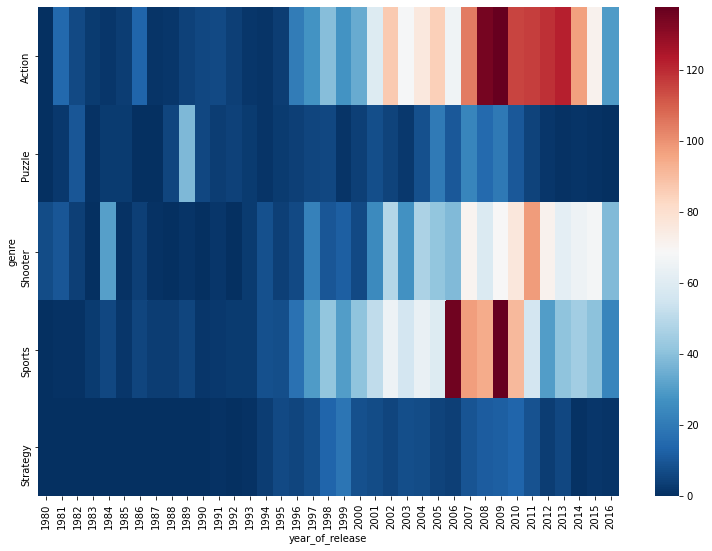

In [140]:
plt.figure(figsize=(13,9))
sns.heatmap(df_heatmap_genres.T, cmap="RdBu_r")
plt.show()

All of the genres are not new, almost all of them emerged in the early 1990th.</br>
<br>If we look at the distribution of the genres throught the years we will see that strategy games emerged at the very beginning of 1990th together with fighting. Puzzles were on the peak of their popularity in 2007-2008 but then quickly lost their leading position. Misc and aventure stepped in by 2010. </br>
<br>Adventure slowly but steadily gain popularity starting from 1995. This genre reached its peak by 2008 as well. Although it was almost twise less popular, the number of its fans stayed stable till the year of analysis, 2016.</br> 
<br>As to the sales leader, Action, it boomed by 2008 and keept this level of popularity by 2012. That corresponds to the general market trend with games boom in 2008-2009 and market fall in 2012. After a short decrease it seems to be gaining popularity again and in 2015 it is an undisputable leader among other genres. </br>
<br>Shooter genre has a longer history of success: first peak in 1996 with a slight decrease in 1998, second impessive peak in 2004 that lasted till 2009. And now, in 2015 this genre is the 2nd most popular one despite its steady fall since 2009-2010. </br>
<br>Sports genre had two peaks of poopularity: 2001-2003 and 2008-2009, by 2015 the interest in this genre seems to get a fresh impulse.   
All of the market leaders' distriibutions have thicker tails to the right. 

# Creation of a user profile for each region <a id='12'></a>

### Top 5 platforms by regions

#### NA sales

In [86]:
platform_sales_na = df[['platform', 'na_sales']].groupby('platform').sum().sort_values(by='na_sales', ascending=False).reset_index()
platform_sales_na

platform  na_sales
0      X360    595.74
1       PS2    572.92
2       Wii    486.87
3       PS3    390.13
4        DS    380.31
5        PS    334.72
6       GBA    184.12
7        XB    182.06
8       N64    138.91
9        GC    131.94
10      NES    125.94
11       GB    113.64
12      PS4    108.74
13      PSP    107.27
14       PC     93.34
15     XOne     93.12
16      3DS     82.65
17     2600     80.78
18     SNES     61.23
19     WiiU     38.10
20      GEN     19.27
21      PSV     12.47
22       DC      5.43
23      SCD      1.00
24      SAT      0.72
25      3DO      0.00
26     PCFX      0.00
27       NG      0.00
28       GG      0.00
29     TG16      0.00
30       WS      0.00

In [87]:
#calculating market share for every platform
platform_sales_na['percentage_na'] = (platform_sales_na['na_sales']/platform_sales_na['na_sales'].sum())*100

platform_sales_na.head()

platform  na_sales  percentage_na
0     X360    595.74      13.722238
1      PS2    572.92      13.196604
2      Wii    486.87      11.214533
3      PS3    390.13       8.986230
4       DS    380.31       8.760037

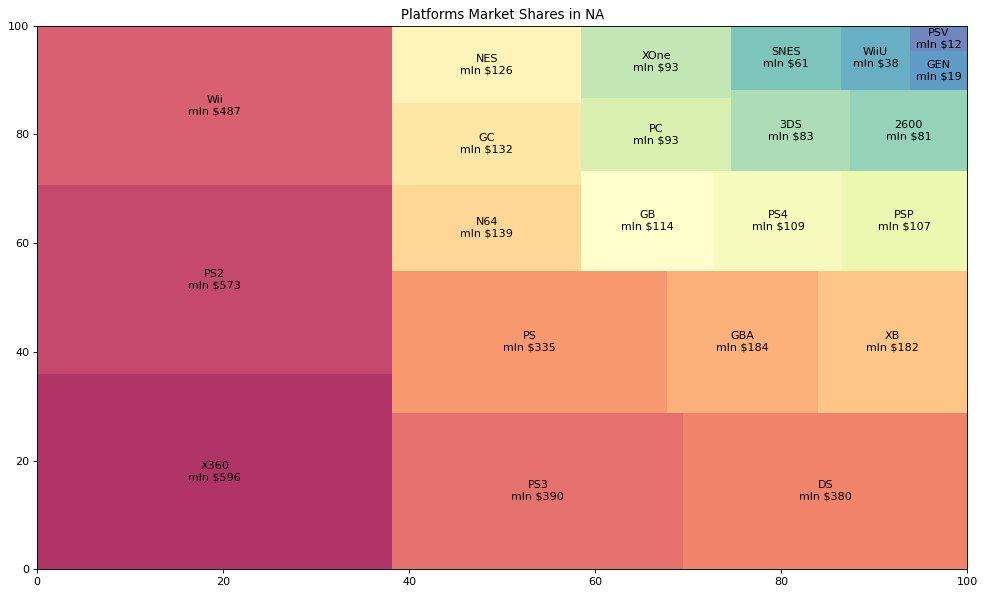

In [88]:
# NA market view for platforms 
platform_sales_na=platform_sales_na[platform_sales_na['na_sales']>=6]

sizes=platform_sales_na.na_sales.values.tolist()
labels = platform_sales_na.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Platforms Market Shares in NA')
#plt.axis('off')
plt.show()

Five top selling platforms for North America are:
X360, PS2, Wii, PS3, DS.  

#### EU sales

In [89]:
#creating a table
platform_sales_eu = df[['platform', 'eu_sales']].groupby('platform').sum().sort_values(by='eu_sales', ascending=False).reset_index()
#calculating market share for every platform
platform_sales_eu['percentage_eu'] = (platform_sales_eu['eu_sales']/platform_sales_eu['eu_sales'].sum())*100

platform_sales_eu.head()

platform  eu_sales  percentage_eu
0      PS2    332.63      13.861432
1      PS3    327.21      13.635568
2     X360    268.32      11.181491
3      Wii    258.32      10.764769
4       PS    212.39       8.850763

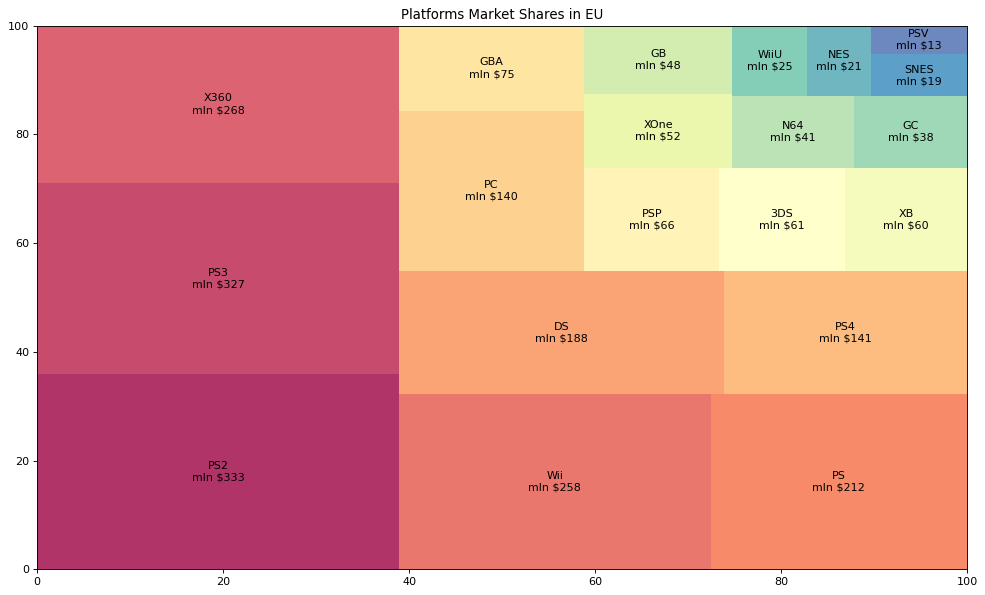

In [90]:
# EU market view for platforms 
platform_sales_eu=platform_sales_eu[platform_sales_eu['eu_sales']>=6]

sizes=platform_sales_eu.eu_sales.values.tolist()
labels = platform_sales_eu.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Platforms Market Shares in EU')
#plt.axis('off')
plt.show()

Five top selling platforms for Europe are:
PS2, PS3, X360, Wii, PS.  

#### Japan sales

In [91]:
#creating a table
platform_sales_jp = df[['platform', 'jp_sales']].groupby('platform').sum().sort_values(by='jp_sales', ascending=False).reset_index()
#calculating market share for every platform
platform_sales_jp['percentage_jp'] = (platform_sales_jp['jp_sales']/platform_sales_jp['jp_sales'].sum())*100

platform_sales_jp.head()

platform  jp_sales  percentage_jp
0       DS    175.00      13.559375
1       PS    139.78      10.830454
2      PS2    137.54      10.656894
3     SNES    116.55       9.030543
4      3DS    100.62       7.796253

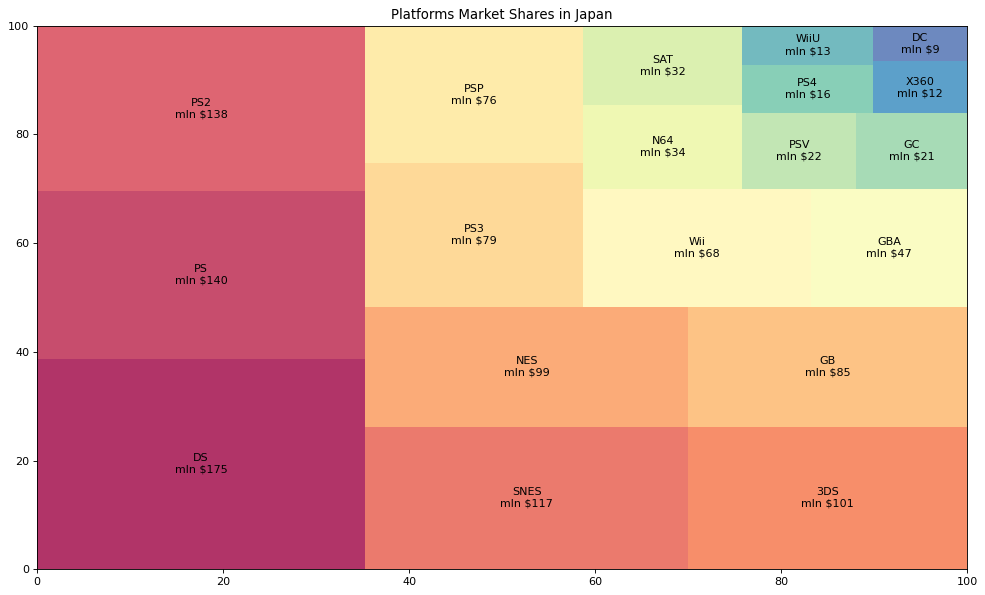

In [92]:
# Japan market view for platforms 
platform_sales_jp=platform_sales_jp[platform_sales_jp['jp_sales']>=3]

sizes=platform_sales_jp.jp_sales.values.tolist()
labels = platform_sales_jp.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Platforms Market Shares in Japan')
#plt.axis('off')
plt.show()

Five top selling platforms in Japan are:
DS, PS, PS2, 3DS, PS3.  

All in all we have the following leaders for the 3 regions: X360, PS2, Wii, PS3, DS, PS, 3DS. We will build a stacked bar chart to illustrate the difference in sales more clearly. 

In [93]:
#creating a separate column with the names of leading platforms and "others" 
top_platforms = ['X360', 'PS2', 'Wii', 'PS3', 'DS', 'PS', '3DS'] #list of leaders 
df['platform_name'] = [x if x in top_platforms else 'other' for x in df['platform']]
df['platform_name'].value_counts()

other    6670
PS2      2127
DS       2120
PS3      1306
Wii      1286
X360     1232
PS       1190
3DS       512
Name: platform_name, dtype: int64

In [94]:
#Creating a table with platform sales split through the markets for the stacked bar chart
platform_sales_all = df[['platform_name', 'na_sales', 'eu_sales', 'jp_sales']].groupby('platform_name').sum().reset_index()
platform_sales_all.head()

platform_name  na_sales  eu_sales  jp_sales
0           3DS     82.65     61.27    100.62
1            DS    380.31    188.41    175.00
2            PS    334.72    212.39    139.78
3           PS2    572.92    332.63    137.54
4           PS3    390.13    327.21     79.41

In [95]:
#pie chart for market shares
from plotly.subplots import make_subplots
import plotly.graph_objects as go

labels = ['X360', 'PS2', 'Wii', 'PS3', 'DS', 'PS', '3DS', 'other']
value1 = platform_sales_all['na_sales']
value2 = platform_sales_all['eu_sales']
value3 = platform_sales_all['jp_sales']
fig = make_subplots(2, 2, specs=[[{'type':'domain'},    {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['NA', 'EU', 'JP'])
fig.add_trace(go.Pie(labels=labels, values=value1, scalegroup='one',
                     name="NA"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=value2, scalegroup='one',
                     name="EU"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=value3, scalegroup='one',
                     name="JP"), 2, 1)

fig.update_layout(title_text='Markets Shares of Platforms')
fig.show()

In [96]:
import plotly.express as px

fig = px.bar(platform_sales_all, x="platform_name", y=["na_sales", "eu_sales", "jp_sales"], title="Stacked bar chart of platform sales in 3 regions")
fig.show()

<br>The ranking shows leading gaming platforms on different world markets by gaming revenue in the measured period. In every region the platforms perform differently but EU and NA have much more in common in comparison to Japan market. For example X360 has significant market share there wherease in EU and NA it is far from being a leader. 3PS that is an udisputable leader in NA and no.3 in EU has hardly got 1% of market in Japan. </br>
<br>Shares of market leaders vary from 15% to 8% in all 3 regions. </br>
<br>In absolute values of sales North America is the largest market and Japan is the smallest among these 3 regions. Sizes of the pie charts represent these correlation. </br>
<br>Thus we can conclude that there is no absolute leader that would be no. 1 platform for every region. Only PS3 managed to stay among top 3 patforms for all 3 markets. </br>


### Top 5 genres by regions <a id='13'></a>

#### NA sales

In [97]:
genres_sales_na = df[['genre', 'na_sales']].groupby('genre').sum().sort_values(by='na_sales', ascending=False).reset_index()
genres_sales_na

genre  na_sales
0         Action    863.17
1         Sports    671.20
2        Shooter    584.83
3       Platform    444.44
4           Misc    399.57
5         Racing    356.86
6   Role-Playing    330.04
7       Fighting    220.51
8     Simulation    180.40
9         Puzzle    121.13
10     Adventure    101.52
11      Strategy     67.75

In [98]:
#calculating market share for every genre
genres_sales_na['percentage_na'] = (genres_sales_na['na_sales']/genres_sales_na['na_sales'].sum())*100

genres_sales_na.head()

genre  na_sales  percentage_na
0    Action    863.17      19.882204
1    Sports    671.20      15.460379
2   Shooter    584.83      13.470938
3  Platform    444.44      10.237203
4      Misc    399.57       9.203671

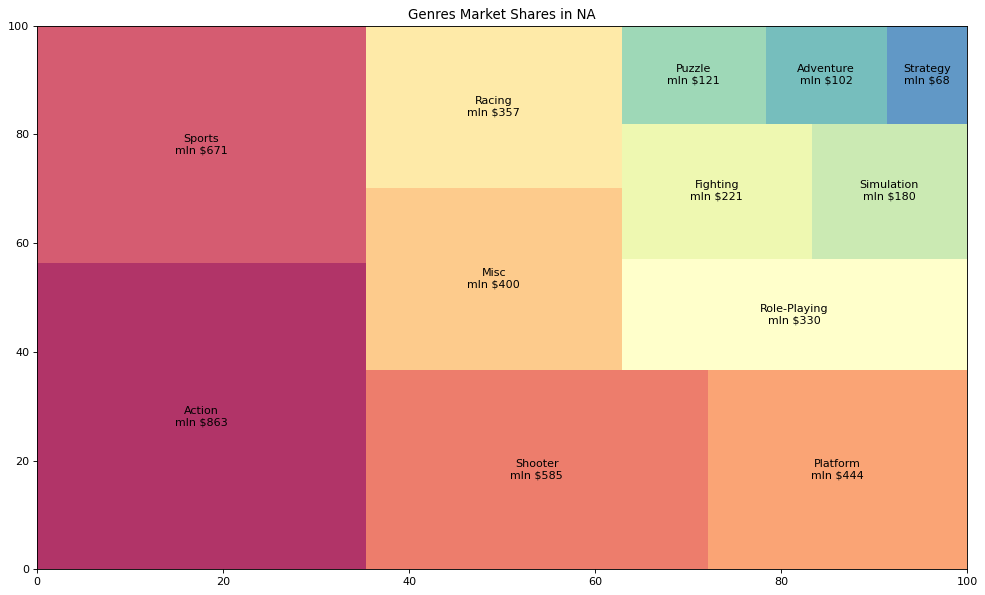

In [99]:
# NA market view for genres 
genres_sales_na=genres_sales_na[genres_sales_na['na_sales']!=0]

sizes=genres_sales_na.na_sales.values.tolist()
labels = genres_sales_na.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Genres Market Shares in NA')
#plt.axis('off')
plt.show()

Five top selling genres for North America are:
action, sports, shooter, misc and racing.  

#### EU sales

In [100]:
genres_sales_eu = df[['genre', 'eu_sales']].groupby('genre').sum().sort_values(by='eu_sales', ascending=False).reset_index()
genres_sales_eu

genre  eu_sales
0         Action    510.99
1         Sports    371.33
2        Shooter    314.52
3         Racing    234.49
4           Misc    210.60
5       Platform    199.39
6   Role-Playing    188.24
7     Simulation    113.35
8       Fighting     99.00
9      Adventure     63.20
10        Puzzle     49.78
11      Strategy     44.79

In [101]:
#calculating market share for every genre
genres_sales_eu['percentage_eu'] = (genres_sales_eu['eu_sales']/genres_sales_eu['eu_sales'].sum())*100

genres_sales_eu.head()

genre  eu_sales  percentage_eu
0   Action    510.99      21.294089
1   Sports    371.33      15.474147
2  Shooter    314.52      13.106748
3   Racing    234.49       9.771720
4     Misc    210.60       8.776170

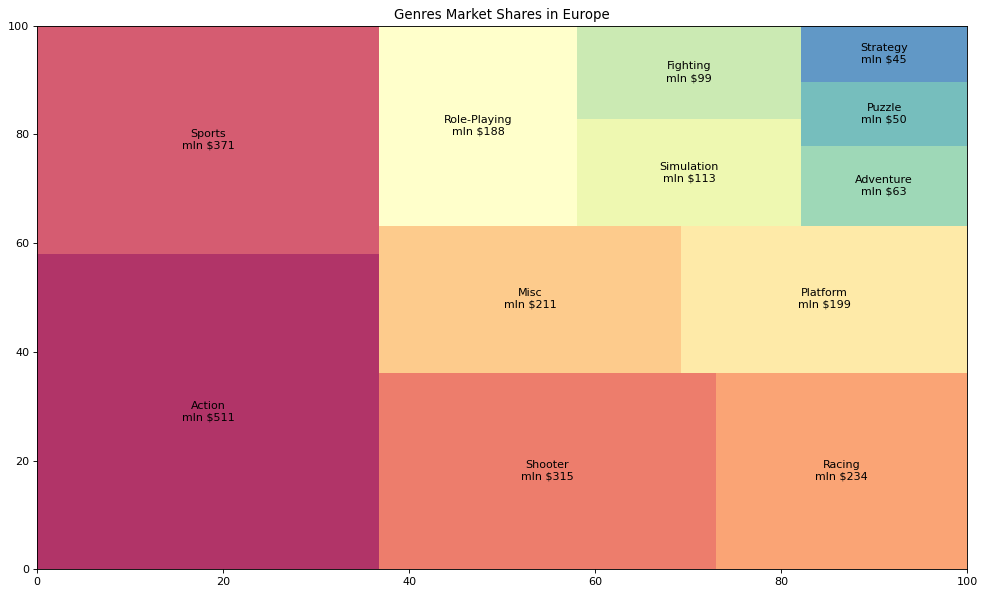

In [102]:
# eu market view for genres 
genres_sales_eu=genres_sales_eu[genres_sales_eu['eu_sales']!=0]

sizes=genres_sales_eu.eu_sales.values.tolist()
labels = genres_sales_eu.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Genres Market Shares in Europe')
#plt.axis('off')
plt.show()

#### Japan sales

In [103]:
genres_sales_jp = df[['genre', 'jp_sales']].groupby('genre').sum().sort_values(by='jp_sales', ascending=False).reset_index()
genres_sales_jp

genre  jp_sales
0   Role-Playing    353.39
1         Action    160.12
2         Sports    134.93
3       Platform    130.71
4           Misc    107.02
5       Fighting     87.28
6     Simulation     63.64
7         Puzzle     56.68
8         Racing     56.63
9      Adventure     52.24
10      Strategy     49.30
11       Shooter     38.68

In [104]:
#calculating market share for every genre
genres_sales_jp['percentage_jp'] = (genres_sales_jp['jp_sales']/genres_sales_jp['jp_sales'].sum())*100

genres_sales_jp.head()

genre  jp_sales  percentage_jp
0  Role-Playing    353.39      27.381414
1        Action    160.12      12.406440
2        Sports    134.93      10.454665
3      Platform    130.71      10.127691
4          Misc    107.02       8.292139

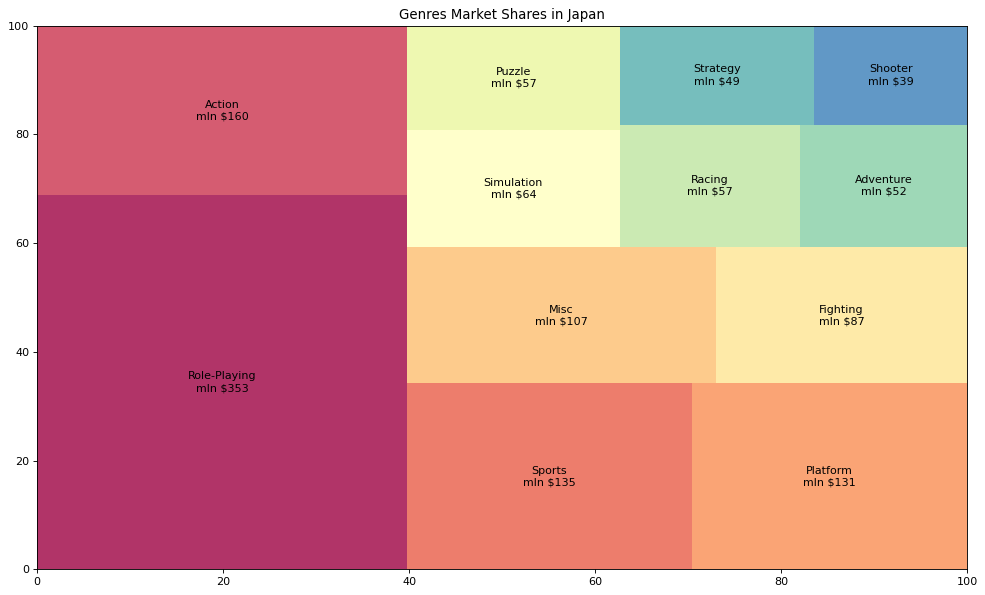

In [105]:
# Japan market view for genres 
genres_sales_jp=genres_sales_jp[genres_sales_jp['jp_sales']!=0]

sizes=genres_sales_jp.jp_sales.values.tolist()
labels = genres_sales_jp.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Genres Market Shares in Japan')
#plt.axis('off')
plt.show()

Five top selling genres for Japan are:
role-playing, action, sports, misc and platform.  

All in all we have the following leaders for the 3 regions: Action, Sports, Shooter, Misc,  Racing, Platform and Role-playing.  We will build a stacked bar chart to see the difference in sales more clearly. 

In [106]:
#creating a separate column with the names of leading genres and "others" 
top_genres = ['Action', 'Sports', 'Shooter', 'Misc','Racing', 'Platform', 'Role-Playing'] #list of genre leaders 
df['genre_name'] = [x if x in top_genres else 'other' for x in df['genre']]
df['genre_name'].value_counts()

other           4229
Action          3306
Sports          2306
Misc            1721
Role-Playing    1481
Shooter         1296
Racing          1226
Platform         878
Name: genre_name, dtype: int64

In [107]:
#Creating a table with platform sales split through the markets for the stacked bar chart
genres_sales_all = df[['genre_name', 'na_sales', 'eu_sales', 'jp_sales']].groupby('genre_name').sum().reset_index()
genres_sales_all

genre_name  na_sales  eu_sales  jp_sales
0        Action    863.17    510.99    160.12
1          Misc    399.57    210.60    107.02
2      Platform    444.44    199.39    130.71
3        Racing    356.86    234.49     56.63
4  Role-Playing    330.04    188.24    353.39
5       Shooter    584.83    314.52     38.68
6        Sports    671.20    371.33    134.93
7         other    691.31    370.12    309.14

In [108]:
#pie chart for market shares
from plotly.subplots import make_subplots
import plotly.graph_objects as go

#labels = ['Action', 'Sports', 'Shooter', 'Misc', 'Racing', 'Platform', 'Role-Playing', 'other']
labels = genres_sales_all['genre_name']
value1 = genres_sales_all['na_sales']
value2 = genres_sales_all['eu_sales']
value3 = genres_sales_all['jp_sales']
fig = make_subplots(2, 2, specs=[[{'type':'domain'},    {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['NA', 'EU', 'JP'])
fig.add_trace(go.Pie(labels=labels, values=value1, scalegroup='one',
                     name="NA"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=value2, scalegroup='one',
                     name="EU"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=value3, scalegroup='one',
                     name="JP"), 2, 1)

fig.update_layout(title_text='Markets Shares of genres')
fig.show()

In [109]:
import plotly.express as px

fig = px.bar(genres_sales_all, x="genre_name", y=["na_sales", "eu_sales", "jp_sales"], title="Stacked bar chart of genres sales in 3 regions")
fig.show()

<br>The charts show leading genres across 3 different world markets. Leading genres for NA and US are almost the same, just a slight rotation of "Racing" and "Misc" on 4th and 5th places. "Action" is an undisputebale leader for both markets with market share over 20%. </br>
<br>In Japan almost 1/3 of the selling games are "Role-Playing"; in Europe and North America it is on the 6th place with market share of 8%. Although in absolute figures sales of this genre in Japan and America are almost the same. </br>
<br>"Misc" and "Platform" have the same market shares on the all 3 markets (7-9%). Although "Platform" even got to the top 5 genres in Japan.</br>
<br>Dramatic difference in genre preferences are illustrated also by "Shooter" and "Racing". They are absolutely not popular in Japan unlike NA and EU. </br>
<br></br>


### ESRB ratings and sales in individual regions

#### NA sales

In [110]:
# As ESRB ratings were istablished only in 1994, we will select only data after this period. 
df_after_1994 = df[df.year_of_release>=1994]

In [111]:
rating_sales_na = df_after_1994[['rating', 'na_sales']].groupby('rating').sum().sort_values(by='na_sales', ascending=False).reset_index()
rating_sales_na

rating  na_sales
0      E   1274.24
1      T    747.58
2      M    742.87
3   E10+    345.50
4    K-A      2.56
5     EC      1.53
6     AO      1.26
7     RP      0.00

In [112]:
#calculating share for every rating type
rating_sales_na['percentage_na'] = (rating_sales_na['na_sales']/rating_sales_na['na_sales'].sum())*100

rating_sales_na.head()

rating  na_sales  percentage_na
0      E   1274.24      40.899491
1      T    747.58      23.995198
2      M    742.87      23.844021
3   E10+    345.50      11.089570
4    K-A      2.56       0.082169

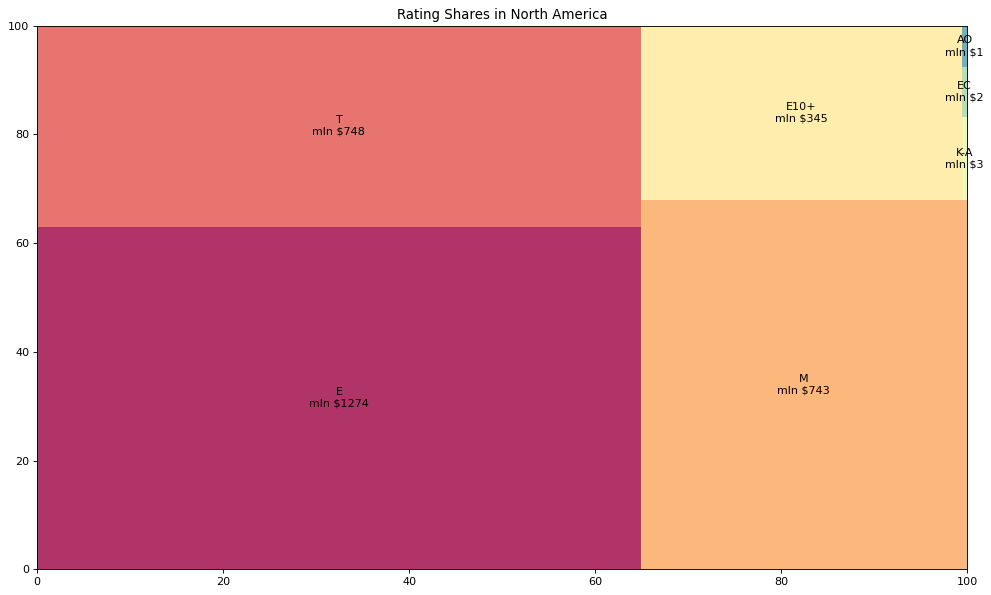

In [113]:
# rating shares in NA
rating_sales_na=rating_sales_na[rating_sales_na['na_sales']!=0]

sizes=rating_sales_na.na_sales.values.tolist()
labels = rating_sales_na.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Rating Shares in North America')
#plt.axis('off')
plt.show()

The most selling games have rating E, T, M and E10 (which is a lot as this category was established only 10 years later than the rest). 

#### EU sales

In [114]:
rating_sales_eu = df_after_1994[['rating', 'eu_sales']].groupby('rating').sum().sort_values(by='eu_sales', ascending=False).reset_index()
rating_sales_eu

rating  eu_sales
0      E    703.87
1      M    480.00
2      T    420.99
3   E10+    183.33
4     AO      0.61
5    K-A      0.27
6     EC      0.11
7     RP      0.03

In [115]:
#calculating market share for every rating
rating_sales_eu['percentage_eu'] = (rating_sales_eu['eu_sales']/rating_sales_eu['eu_sales'].sum())*100

rating_sales_eu.head()

rating  eu_sales  percentage_eu
0      E    703.87      39.339709
1      M    480.00      26.827483
2      T    420.99      23.529379
3   E10+    183.33      10.246422
4     AO      0.61       0.034093

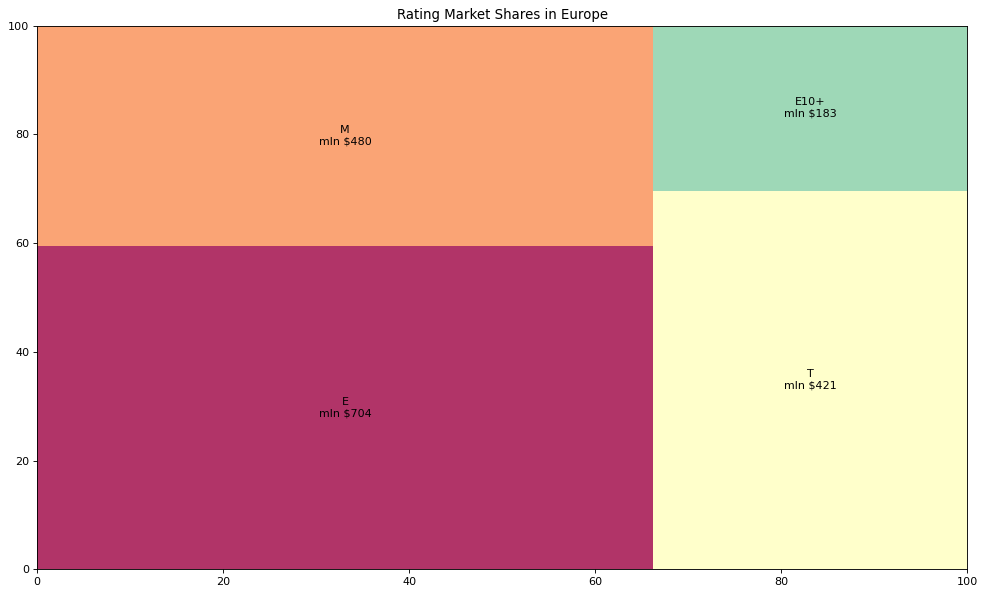

In [116]:
# ratings for eu market
rating_sales_eu=rating_sales_eu[rating_sales_eu['eu_sales']>1]

sizes=rating_sales_eu.eu_sales.values.tolist()
labels = rating_sales_eu.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Rating Market Shares in Europe')
#plt.axis('off')
plt.show()

#### Japan sales

In [117]:
rating_sales_jp = df_after_1994[['rating', 'jp_sales']].groupby('rating').sum().sort_values(by='jp_sales', ascending=False).reset_index()
rating_sales_jp

rating  jp_sales
0      E    197.96
1      T    150.70
2      M     63.58
3   E10+     40.20
4    K-A      1.46
5     AO      0.00
6     EC      0.00
7     RP      0.00

In [118]:
#calculating market share for every genre
rating_sales_jp['percentage_jp'] = (rating_sales_jp['jp_sales']/rating_sales_jp['jp_sales'].sum())*100

rating_sales_jp.head()

rating  jp_sales  percentage_jp
0      E    197.96      43.613131
1      T    150.70      33.201146
2      M     63.58      14.007491
3   E10+     40.20       8.856576
4    K-A      1.46       0.321657

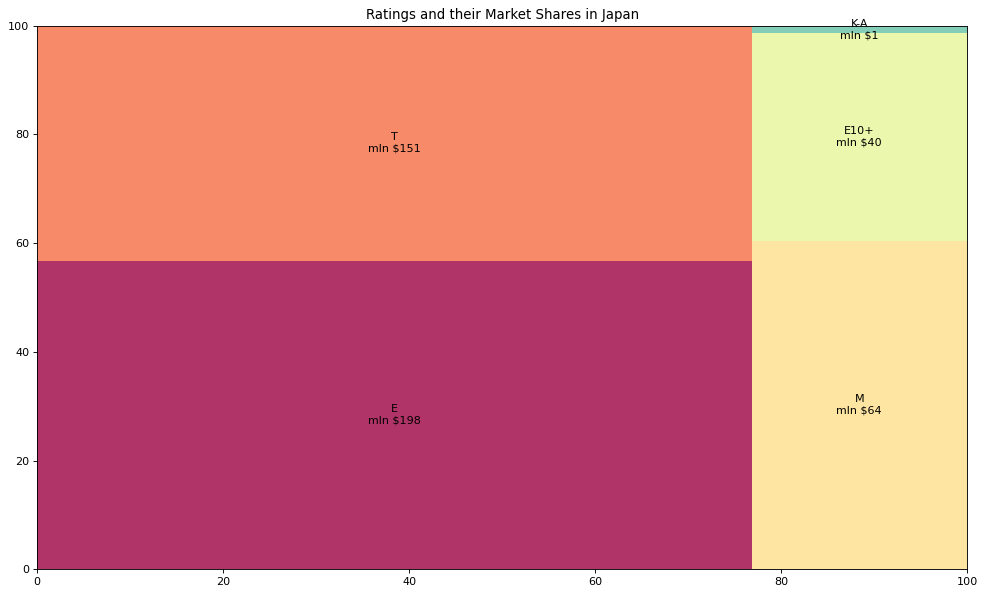

In [119]:
# Japan market view for ratings 
rating_sales_jp=rating_sales_jp[rating_sales_jp['jp_sales']!=0]

sizes=rating_sales_jp.jp_sales.values.tolist()
labels = rating_sales_jp.apply(lambda x: str(x[0]) + "\n" + "mln $" + str(round(x[1])) , axis=1)


colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]

# Draw Plot
plt.figure(figsize=(15,9), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors, alpha=.8)

# Decorate
plt.title('Ratings and their Market Shares in Japan')
#plt.axis('off')
plt.show()

The most popular games in Japan have rating E, games with ratings T, M, E10 are also among the market leaders.

In [120]:
#Creating a table with rating sales split through the markets for the stacked bar chart
rating_sales_all = df_after_1994[['rating', 'na_sales', 'eu_sales', 'jp_sales']].groupby('rating').sum().reset_index()
rating_sales_all

rating  na_sales  eu_sales  jp_sales
0     AO      1.26      0.61      0.00
1      E   1274.24    703.87    197.96
2   E10+    345.50    183.33     40.20
3     EC      1.53      0.11      0.00
4    K-A      2.56      0.27      1.46
5      M    742.87    480.00     63.58
6     RP      0.00      0.03      0.00
7      T    747.58    420.99    150.70

In [121]:
#pie chart for game ratings


labels = rating_sales_all['rating']
value1 = rating_sales_all['na_sales']
value2 = rating_sales_all['eu_sales']
value3 = rating_sales_all['jp_sales']
fig = make_subplots(2, 2, specs=[[{'type':'domain'},    {'type':'domain'}],
                           [{'type':'domain'}, {'type':'domain'}]], 
                    subplot_titles=['NA', 'EU', 'JP'])
fig.add_trace(go.Pie(labels=labels, values=value1, scalegroup='one',
                     name="NA"), 1, 1)
fig.add_trace(go.Pie(labels=labels, values=value2, scalegroup='one',
                     name="EU"), 1, 2)
fig.add_trace(go.Pie(labels=labels, values=value3, scalegroup='one',
                     name="JP"), 2, 1)

fig.update_layout(title_text='Market Shares of ESRB Ratings')
fig.show()

In [141]:
#staked bar chart

fig = px.bar(rating_sales_all, x="rating", y=["na_sales", "eu_sales", "jp_sales"],\
             title="Stacked bar chart of ESRB Ratings in 3 regions")
fig.show()

<br>As to the ratings is concerned, European and American gamers have similar preferences. About 40% of them prefer to be on the safe side and choose games with E rating. Almost a quater in every region chooses games rated for Teens and a quater picks up Mature rated games. In EU percentage of M rated games is slightly higer.  </br>
<br>In Japan share of games with Teens rating is considerably higher: 33% vs 24% in two other regions. Simultaneously percentage Mature rated games is 14 which is 10% lower than in NA and EU regions. </br>
<br>The share of games for children E10 is similar across all 3 regions, in Japan it is insignificantly lower. </br>
<br>All in all E rating is leading in all regions both in market share and in absolute figures.</br>
<br></br>


<br>Based on the performed data analysis we can create the following User Profiles </br>
<br>An average NA gamer prefers X360, PS2, Wii almost with the same likelihood. Most likely the games will be in genre Action, Sports or Shooter with rating E ("Everyone"). </br>
<br> A European gamer has a broder range of preferences: all top 5 platforms have an even chance to be chosen: PS2, PS3, X360, Wii or PS. There is a great probability that likewise his American colleague he or she will pick up Action, Sports or Shooter with rating E.  </br>
<br>An average Japanese gamer prefers DS, PS, PS2 most of all. And when it comes to games' choise,  most likely it will be role-play or action with rating E. </br>


# Part 3. Hypotheses testing <a id='14'></a>

### 1 Average user ratings of the Xbox One and PC 

<br>Stating hypothesis (H0 has to state unchanged result):</br>
<br>H0: average user ratings of the Xbox One and PC platforms are the same</br>
<br>H1: average user ratings of the Xbox One differ from average user ratings for PC platform </br>

In [123]:
#creating 2 db for XBox and PC
df_XB = df.query('platform == "XB"')
df_XB.shape

(803, 14)

In [124]:
df_PS = df.query('platform == "PS"')
df_PS.shape

(1190, 14)

In [125]:
#Getting rid of outliers

#defining outliers with 3-sigma method for both platforms
#as we are calulating std for sample ddof is set to 1

std_score_XB = np.std(df_XB['user_score'], ddof=1)
three_sigma_score_XB_lower = round((df_XB['user_score'].mean() - std_score_XB*3),2)
#we do not use the lower fence as it will give us negative value for user scores. 

three_sigma_score_XB_upper = round((df_XB['user_score'].mean() + std_score_XB*3),2)



std_score_PS = np.std(df_PS['user_score'], ddof=1)
three_sigma_score_PS_lower = round((df_PS['user_score'].mean() - std_score_PS*3),2)
#we do not use the lower fence as it will give us negative value for user scores. 

three_sigma_score_PS_upper = round((df_PS['user_score'].mean() + std_score_PS*3),2)

print('99.7% of games on XB platform have rating from  0 to ', three_sigma_score_XB_upper,'. \n99.7% of of games on PS platform have rating from 0 to ', three_sigma_score_PS_upper,'.')

99.7% of games on XB platform have rating from  0 to  15.52 . 
99.7% of of games on PS platform have rating from 0 to  9.99 .


In [126]:
#setting df without outliers

df_XB_no_outliers = df_XB.query('user_score<=@three_sigma_score_XB_upper')

df_PS_no_outliers = df_PS.query('user_score<=@three_sigma_score_PS_upper')

In [127]:
#defining Variance for the two samples to define whether or not we can consider them as equal for t-test.
variance_XB = np.var(df_XB_no_outliers['user_score'])
print('Variance for XB ratings sample is ', variance_XB)

Variance for XB ratings sample is  9.493162099164262


In [128]:
variance_PS = np.var(df_PS_no_outliers['user_score'])
print('Variance for PS rating sample is ', variance_PS)

Variance for PS rating sample is  8.494360009886227


<br>Explanation of the method choise for hypothesis testing</br>
<br>As we have two samples of continuous data, the samples are drawn from a normally distributed data with different variances we will conduct a Welch test to test hypothesis (in Python it will be a two-tailed T-test with correction 'equal_var = False').
</br>
<br>A critical statistical significance level will be set at 0.05 as it is a commonly-accepted level and as we do not conduct medical testing, higher acuracy is not required</br>

In [129]:
alpha = .05 
# "equal_var = False" as previous calculations proved that the 2 samples have different variance value. 
results =  st.ttest_ind(df_XB_no_outliers['user_score'], df_PS_no_outliers['user_score'], equal_var = False) 

print('p-value:', results.pvalue/2) 
#we are making two-tailed test as we are checking whether the av. rating of the two platforms differ, 
#no matter if one is bigger or smaller than the other

 
if (results.pvalue/2 < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 2.571064927205229e-214
We reject the null hypothesis


The data provides sufficient evidence, given the significance level we selected (5%), to reject the null hypothesis. Therefore, we can conclude that average users score of games on  Xbox One platform and average score on  PC platform are not the same (μ1 != μ2).

### 2 Average user ratings  for the Action and Sports genres

<br>Stating hypothesis (H0 states unchanged result): </br>
<br>H0: average user ratings of Action and Sports genres are the same</br>
<br>H1: average user ratings of Action and Sports genres are different </br>

In [130]:
#creating 2 db for Action and Sports
df_Action = df.query('genre == "Action"')
df_Action.shape

(3306, 14)

In [131]:
df_Sports = df.query('genre == "Sports"')
df_Sports.shape

(2306, 14)

In [132]:
#Getting rid of outliers

#defining outliers with 3-sigma method for both platforms
#as we are calulating std for sample ddof is set to 1

std_score_Action = np.std(df_Action['user_score'], ddof=1)
three_sigma_score_Action_lower = round((df_Action['user_score'].mean() - std_score_Action*3),2)
#we do not use the lower fence as it will give us negative value for user scores. 

three_sigma_score_Action_upper = round((df_Action['user_score'].mean() + std_score_Action*3),2)



std_score_Sports = np.std(df_Sports['user_score'], ddof=1)
three_sigma_score_Sports_lower = round((df_Sports['user_score'].mean() - std_score_Sports*3),2)
#we do not use the lower fence as it will give us negative value for user scores. 

three_sigma_score_Sports_upper = round((df_Sports['user_score'].mean() + std_score_Sports*3),2)

print('99.7% of games of Action genre have rating from  0 to ', three_sigma_score_Action_upper,'. \n99.7% of of games of Sports genre have rating from 0 to ', three_sigma_score_Sports_upper,'.')

99.7% of games of Action genre have rating from  0 to  15.16 . 
99.7% of of games of Sports genre have rating from 0 to  14.86 .


In [133]:
#setting df without outliers

df_Action_no_outliers = df_Action.query('user_score<=@three_sigma_score_Action_upper')

df_Sports_no_outliers = df_Sports.query('user_score<=@three_sigma_score_Sports_upper')

In [134]:
#defining Variance for the two samples to define whether or not we can consider them as equal for t-test.
variance_Action = np.var(df_Action_no_outliers['user_score'])
print('Variance for Action ratings sample is ', variance_Action)

Variance for Action ratings sample is  12.85548225027838


In [135]:
variance_Sports = np.var(df_Sports_no_outliers['user_score'])
print('Variance for Sports rating sample is ', variance_Sports)

Variance for Sports rating sample is  13.339070060455569


<br>As we have two samples of continuous data, the samples are drawn from a normally distributed data with close values of variances we will conduct an unpaired t-test to test the stated hypothesis (in Python it will be unpaired two-tailed T-test with 'equal_var = True').</br>

<br>A critical statistical significance level will be set at 0.05 as it is a commonly-accepted one. </br>

In [136]:
alpha = .05 
# "equal_var = True" as previous calculations proved that the 2 samples have very close variance values. 
results =  st.ttest_ind(df_Action_no_outliers['user_score'], df_Sports_no_outliers['user_score'], equal_var = True) 

print('p-value:', results.pvalue/2) 
#we are making two-tailed test as we are checking whether the av. rating of the two genres differ, 
#no matter if one is bigger or smaller than the other

 
if (results.pvalue/2 < alpha):
    print("We reject the null hypothesis")
else:
    print("We can't reject the null hypothesis")

p-value: 1.8333824403745673e-07
We reject the null hypothesis


The data provides sufficient evidence, given the significance level we selected (5%), to reject the null hypothesis. Therefore, we can conclude that average users ratings of Action and Sports genres are different (μ1 != μ2). 

# General conclusion <a id='15'></a>

<br>We have performed analysis of the game platforms data for the period 1980-1916. </br>
As data contained a lot of missing values in some of the sections we had partly restored them. Some data containing missing values was dropped (but not more than 3%).</br>
<br>We explored dynamics of game releases, and found some patterns: game releases boomed from 1994, 
period of 2008 - 2009 was the most prolific, but was followed by a sharp decline in releases the following years. 
After a slight recovery in 2014 the number of released games per year stayed stable. </br>
<br>Having analized total sales on 3 major markets though the above years we have figured out that the following platforms were the most successful ones: 
PS2, X360, PS3, Wii, DS and PS.</br>
<br>They were launched in different years and reined for a while. Peak period lasted for 2-4 years followed by decline of a platform. Decline of one platform coresponded to a launch of another successor.   An average life cycle of a platform is 10 years. </br>
<br>By 2016 all the above platforms ended or were ending their life cycle.</br>

<br>Relevant years for platforms analysis were picked up as 2000-2015. This period correspond to 1.5 lifecycle of a platform and could allow to make prognosis. </br>
<br>Sales analysis of the market leaders 2000-2016 shows that the platforms perform differently in terms of total sales. We have different median values, minimum and maximum values, the their sales distribution is scewed in different ways. 
To conclude, the statistics of sales of leading platforms have significant differences. </br>

<br> Also we have figured out that critis scores of the games have very strong positive linear correlation with the total sales. 
Correlation with user rating is usually weak, negative and not stable through the platforms.</br>

<br>As to the game distribution by genres, the charts show that the most profitable genres are: action, sports and and shooter. Puzzle and strategy have brought the least amount of money. 
Despite the fact that these 2 genres look like outsiders, they were very popular back in their days. 
Puzzle had a very bright but short peak in 2007-2008 and Strategy emerged before 1990 and had several peaks during its cycle. Distributions for these 2 genres have thicker tails to the left. </br>
<br>Distributions of the market leaders have hicker tails to the right.</br>

<br>Analizing platforms behaviour on 3 main markets we can see that every region have their own favourits. Genres popularity on these markets makes it even more obvious that every market has its specifics due to different economical and cultural background.  </br>
